## Build MRCNN Model -Load MRCNN and FCN weights - Load Training Files  

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import copy    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib          import cm
import mrcnn.utils       as utils
import mrcnn.visualize   as visualize
import mrcnn.visualize  as vis
import mrcnn.visualize_2 as vis2
from mrcnn.prep_notebook import build_fcn_inference_pipeline_newshapes, build_fcn_evaluate_pipeline_newshapes
from mrcnn.prep_notebook import get_inference_batch, get_evaluate_batch, get_image_batch
from mrcnn.prep_notebook import run_mrcnn_detection, run_fcn_detection, run_fcn_evaluation
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.visualize     import display_training_batch
import mrcnn.experiments as exp

# from mrcnn.utils         import trim_zeros, compute_overlaps
# from mrcnn.calculate_map import update_map_dictionaries

# WEIGHT_FILE = 'F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_2298.h5' 
# FCN_WEIGHT_FILE = 'F:\\models_newshapes\\train_fcn8_l2_newshapes\\fcn20181224T0000\\fcn_0821.h5'
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --dataset        newshapes2 "
input_parms +=" --mrcnn_logs_dir train_mrcnn "
input_parms +=" --fcn_logs_dir   train_fcn8L2_BCE1 " 
input_parms +=" --mrcnn_model    /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/"+ "mrcnn_0020.h5 "
input_parms +=" --fcn_model      /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/" + "fcn_0089.h5"
input_parms +=" --fcn_arch       fcn8l2 " 
input_parms +=" --sysout         screen "
input_parms +=" --evaluate_method 3"
input_parms +=" --scale_factor    1"
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)

# CLASS_COLUMN        = 4
# ORIG_SCORE_COLUMN   = 5
# DT_TYPE_COLUMN      = 6
# SEQUENCE_COLUMN     = 7
# NORM_SCORE_COLUMN   = 8    
# SCORE_0_SUM_COLUMN  = 9
# SCORE_0_AREA_COLUMN = 10
# SCORE_0_COLUMN      = 11
# SCORE_1_SUM_COLUMN  = 12
# SCORE_1_AREA_COLUMN = 13
# SCORE_1_COLUMN      = 14 
# SCORE_1_NORM_COLUMN = 17
# SCORE_2_SUM_COLUMN  = 18
# SCORE_2_AREA_COLUMN = 19
# SCORE_2_COLUMN      = 20
# SCORE_2_NORM_COLUMN = 23

Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
appending '..' to sys.path


Using TensorFlow backend.


 Init Image Class - Possible Object Choices:  {'building': 3, 'tree': 5, 'airplane': 3, 'sun': 1, 'cloud': 3, 'car': 3, 'person': 5, 'truck': 3}
 Init Image Class - Custom Color Keys      :  ['tree', 'sky', 'ground', 'sun', 'cloud', 'person']
 Init Image Class - Object Priority List   :  ['building', 'tree', 'car']
 Init Image Class - BUILD_MAX_TRIES        :  7
 Init Image Class - PERSON_CAR_DISTANCE    :  10

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   dataset                        newshapes2
   epochs                         1
   evaluate_method                3
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['fcn32+']
   fcn_logs_dir                   train_fcn8L2_BCE1
   fcn_losses                     fcn_BCE_loss
   fcn_model                      /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn201

### 2019-05-13 : We may run in evaluation mode. Here is why:

We run in evaluation mode to bypass the MRCNN detection on objects. When in eval mode, the detection is constructed based on what GT we have passed to the 
detector. In evaluation_mode 3, we assign 0.5 as the score. In other words, the detector is unable to make a confident decision on the object.

In [2]:
mrcnn_model, fcn_model = build_fcn_inference_pipeline_newshapes(args = args)
# mrcnn_model, fcn_model = build_fcn_evaluate_pipeline_newshapes(args = args)

MODE IS: inference

--> Execution started at: 06-17-2019 @ 12:28:48
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
    Build_mrcnn_inference_pipeline_newshapes MODE is : inference

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   dataset                        newshapes2
   epochs                         1
   evaluate_method                3
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['fcn32+']
   fcn_logs_dir                   train_fcn8L2_BCE1
   fcn_losses                     fcn_BCE_loss
   fcn_model                      /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0089.h5
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir             


 
---------------------------------------------
>>> FCN Scoring Graph  - mode: inference
---------------------------------------------

 
---------------------------------------------
>>> FCN Scoring Graph  - mode: inference
---------------------------------------------

>>> FCN build complete. mode:  inference
>>> FCN initialization complete. mode:  inference

 FCN Configuration Parameters 
 ------------------------------ 

FCN Configuration Parameters:
-----------------------------
BACKBONE_SHAPES                [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        64
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
DETECTION_PER_CLASS            64
DIR_DATASET                    /home/kbardool/MLDatasets/newshapes2
DIR_PRETRAINED                 /home/kbardool/PretrainedModels
DIR_TRAINING                   /

## Load MRCNN  and FCN Weights

In [4]:
# MRCNN_DIR_WEIGHTS =  'F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000'
MRCNN_DIR_WEIGHTS = '/home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000'
# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
mrcnn_files   = ['mrcnn_0001.h5', 'mrcnn_0020.h5', 'mrcnn_0041.h5', 'mrcnn_0060.h5',
                 'mrcnn_0092.h5', 'mrcnn_0116.h5', 'mrcnn_0154.h5', 'mrcnn_0174.h5',
                 'mrcnn_0201.h5', 'mrcnn_0223.h5', 'mrcnn_0243.h5', 'mrcnn_0332.h5']

In [30]:
MRCNN_FILE_IDX = -2
mrcnn_weights_file = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[MRCNN_FILE_IDX])
print("Loading weights ", mrcnn_weights_file)
mrcnn_model.load_model_weights(mrcnn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5 
MRCNN  MODEL Load weight file COMPLETE 


In [6]:
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000'

fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
              'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
              'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
              'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
              'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
              'fcn_0077.h5', 'fcn_0089.h5', 'fcn_0170.h5', 'fcn_0177.h5',
              'fcn_0253.h5', 'fcn_0266.h5']  ## 22,23,24,25


# fcn_files = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#              'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#              'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#              'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#               'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

In [7]:
FILE_IDX = -1
fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", fcn_weights_file)
fcn_model.load_model_weights(fcn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 
FCN  MODEL Load weight file COMPLETE 


## Load test dataset

In [9]:
# with open(os.path.join(mrcnn_model.config.DIR_DATASET,"newshapes2_test_dataset_1000_A.pkl"), 'rb') as infile:
with open(os.path.join("/home/kbardool/MLDatasets/newshapes2","newshapes2_test_dataset_1000_A.pkl"), 'rb') as infile:
    dataset_test = pickle.load(infile)
print(type(dataset_test))    

dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
print(len(dataset_test.image_ids))    
class_names = dataset_test.class_names

<class 'mrcnn.newshapes2.NewImagesDataset'>
 Active Class Information 
--------------------------
[1, 2, 3, 4, 5, 6, 7, 8]
internal_class:  1 ext_cls: 1 category-name: None - person
internal_class:  2 ext_cls: 2 category-name: None - car
internal_class:  3 ext_cls: 3 category-name: None - sun
internal_class:  4 ext_cls: 4 category-name: None - building
internal_class:  5 ext_cls: 5 category-name: None - tree
internal_class:  6 ext_cls: 6 category-name: None - cloud
internal_class:  7 ext_cls: 7 category-name: None - airplane
internal_class:  8 ext_cls: 8 category-name: None - truck
Testing Dataset Image Count: 1000
Testing Dataset Class Count: 9
1000


###  Display some images from dataset

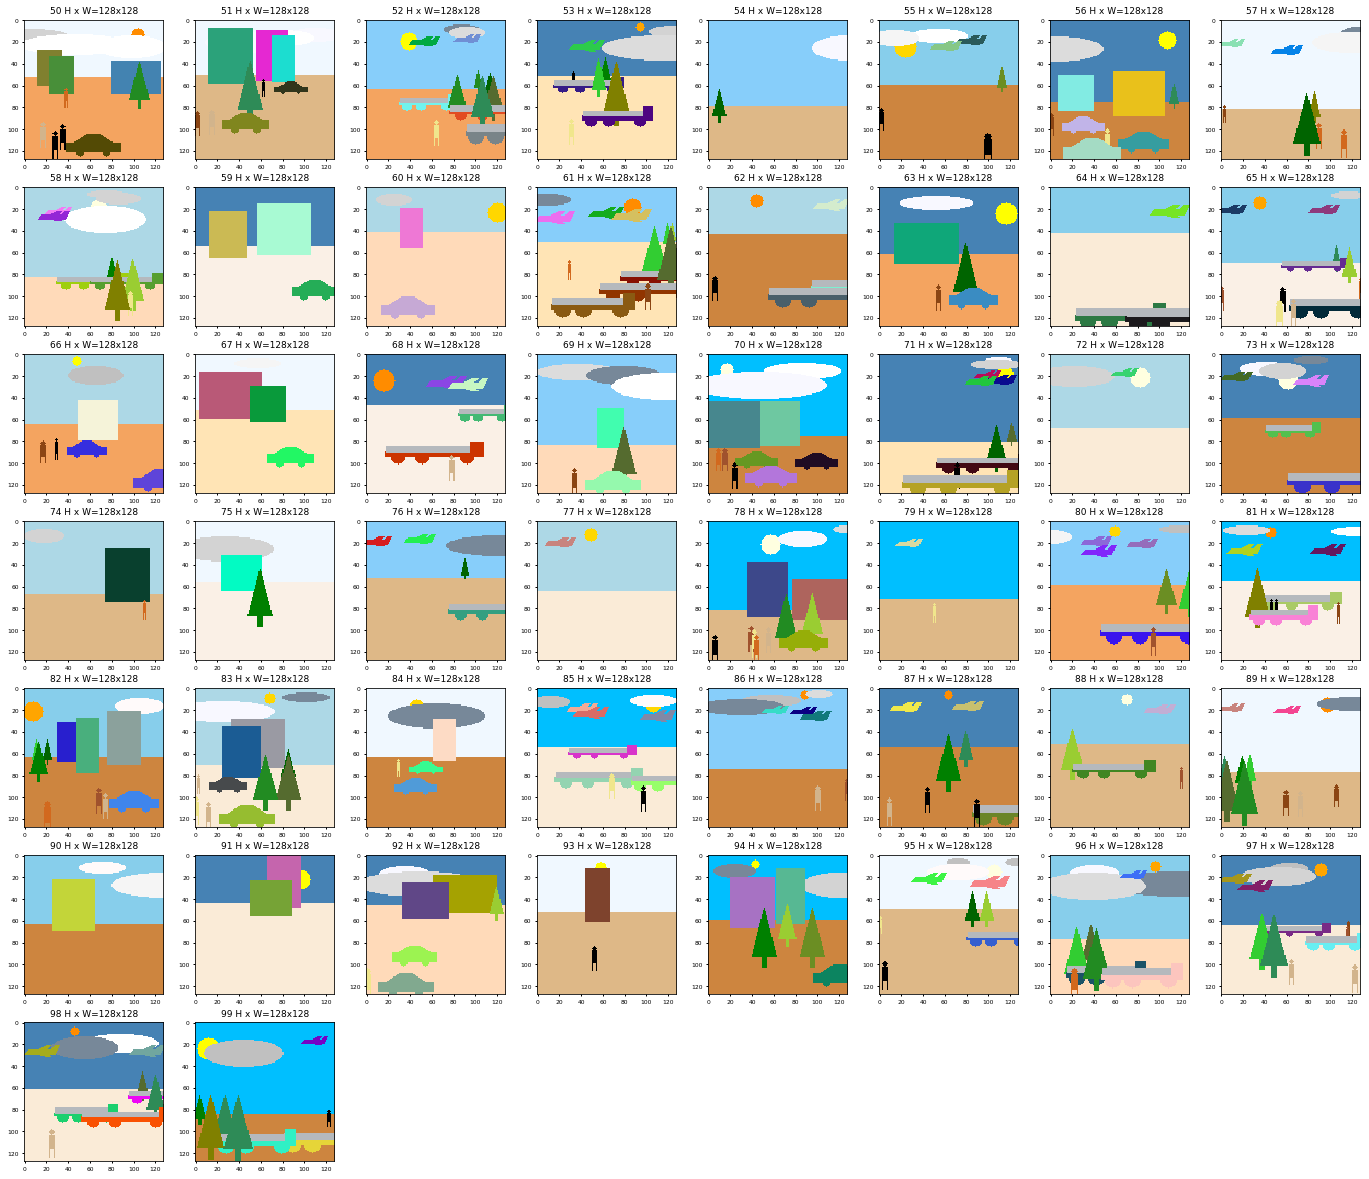

In [4]:
# image_list = list(range(160,200))
image_list = list(range(50,100))
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

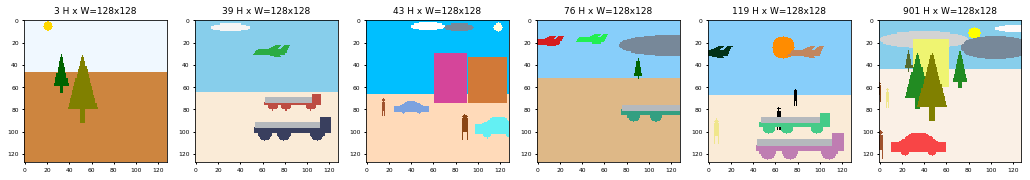

In [5]:
# image_list = list(range(160,200))
# image_list = list(range(0, 80))
image_list = [37, 131, 421, 468, 206 , 18, 29, 67, 72, 74, 77, 79, 176]
image_list = [3,39,43,76,119,901]
image_titles = [str(i) for i in image_list]

images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

## Evaluate indiviual image


GT_BOXES for image  79
--------------------------------------------------------------------------------
        class             |                              
seq  id name              |  Y1  X1  Y2  X2     CX     CY    AREA
--------------------------------------------------------------------------------
  0  2 car                |  56  48  71  81    64.5   63.5   495.00



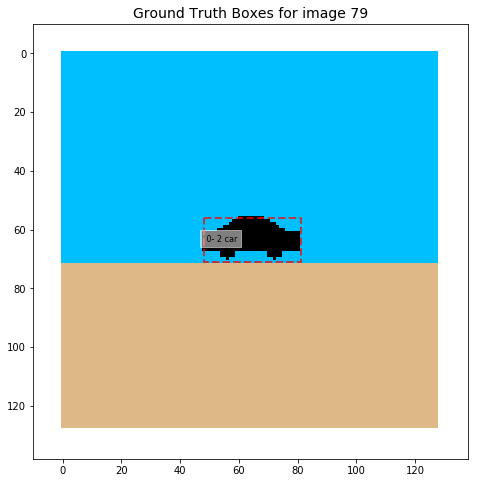

In [33]:
image_id = 79
cols = 8
classes = [1,2,3,4,5,6,7,8]
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
vis2.display_gt_bboxes(dataset_test, dataset_test.config, image_id, size=8, verbose = True)

# r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

In [34]:
vis2.display_pr_fcn_scores(r[0], class_names)



PR_SCORES from fcn/mrcnn_results:   (top line MRCNN, bottom line FCN) 
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              |   |                |     MRCNN / FCN score 0    |         MRCNN / FCN score 1        |        MRCNN / FCN score 2         | 
          class               |TP/| mrcnn  normlzd |  gaussian   bbox   nrm.scr*|  ga.sum    mask     score   norm   |  ga.sum    mask     score   norm   | 
    seq  id name              | FP| score   score  |    sum      area   gau.sum |  in mask   sum              score  |  in mask   sum              score  |  Y1  X1  Y2  X2   AREA  
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  64  7 airplane           | 1 | 0.9133  1.0000 |   0.9720   270.0    0.9720 

In [49]:
print(r[0]['fcn_scores'])
for i in r[0]['fcn_scores'][::-1]:
    print(i)

[[   58.0000    49.0000    68.0000    76.0000     7.0000     0.9133     1.0000    64.0000     1.0000  -171.9358   270.0000  -171.9358    15.8372    40.0000     0.3959     1.0000     1.0000
      1.0000    18.5916    40.0000     0.4648     1.0000     1.0000     1.0000]
 [   56.0000    51.0000    73.0000    78.0000     2.0000     0.7152     1.0000    63.0000     1.0000  -265.1035   459.0000  -265.1035    35.4460    48.0000     0.7385     1.0000     1.0000
      1.0000    25.6721    48.0000     0.5348     1.0000     1.0000     1.0000]
 [   49.0000    46.0000    76.0000    74.0000     4.0000     0.2843     1.0000    62.0000     1.0000  -587.3665   756.0000  -587.3665   -48.8447    64.0000    -0.7632     0.0000     1.0000
      0.0000   -48.8447    64.0000    -0.7632     0.0000     1.0000     0.0000]]
[   49.0000    46.0000    76.0000    74.0000     4.0000     0.2843     1.0000    62.0000     1.0000  -587.3665   756.0000  -587.3665   -48.8447    64.0000    -0.7632     0.0000     1.0000
    

PR_SCORES from fcn/mrcnn_results:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              |   |                |        MRCNN score 0       |          MRCNN score 1             |           MRCNN score 2            |                         
          class               |TP/| mrcnn  normlzd |  gaussian   bbox   nrm.scr*|  ga.sum    mask     score   norm   |  ga.sum    mask     score   norm   |                         
    seq  id name              | FP| score   score  |    sum      area   gau.sum |  in mask   sum              score  |  in mask   sum              score  |  X1  Y1  X2  Y2   AREA  
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  64  7 airplane           | 1 | 0.9847  1.0000 |   0.9322   182.0  

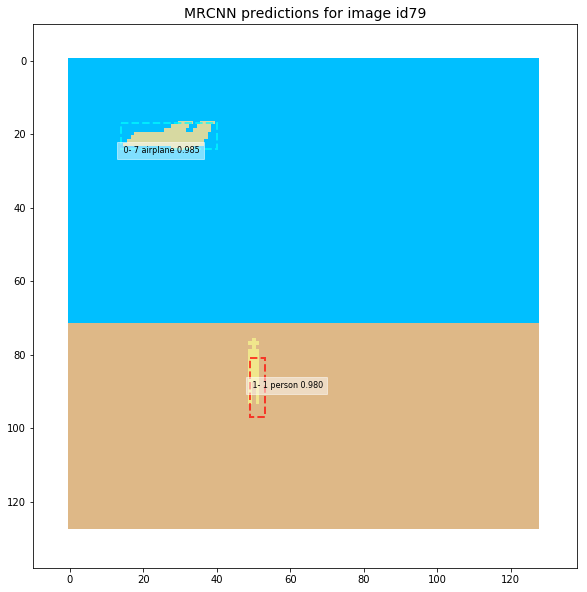

In [13]:
only = None
# only = [2]
vis2.display_pr_scores(r[0], class_names, display = True, size = 10,  only = only)
# vis2.display_pr_hm_scores(r[0], class_names, only = None)
# vis2.display_pr_hm_scores_box_info(r[0], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names, only = only)

In [50]:
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_fcn_scores_box_info2(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)

  FCN BBox Information - classes   --  :  [3, 7]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                         |                                                 |    (COVAR)    |               CLIP REGION   
BOX     class                                            |                   Width   Height                |      SQRT     |      FROM/TO               FROM/TO 
seq  id     name              Y1/X1              Y2/X2   |    CX / CY         (W)  ~  (H)      AREA        |  W/2     H/2  |  X1/Y1    X2/Y2   A |  X1/Y1   X2/Y2   A
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 57   3 sun             ( 20.00, 56.00)  ( 32.00, 74.00) |  65.00/ 26.00    18.00~  12.00   216.00   30.00 |   3.00   

In [ ]:
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)

##  Manipulate some images to test contextual relationships

|Exp |Image     | Original Image | modifications |Conxtextual experiment
|----| :------- |:-------------- | :-------------|:------------------------------------------------------------------ 
| 1 | Image 18 | sun and truck | Remove sun, add building |  move truck around with and without a building present in the image
| 2 | image 67 | Buildings and car|                    | If we move a person around the activation "should" peak when it's in proper position with regards to the car.
| 3 | image 67 | Buildings and car| Remove all objects | and move an object of each class around in black, and in color. 
| 4 | Image 72 | sun and airplane | Remove sun         | move a car around the image, and move a truck around the image , comparing the results. Moving a truck should invoke higher activation than a car, since the cars do not cooccur with an airplane
| 5 | Image 77 | Sun, Airplane    | Remove sun         | move airplane around with and and without a building present in the scene. The activation strength should increase when the building is absent
| 6 | Image 79 | Person, plane | Remove the plane | move a car around the image. Activation of the car should peak when it's in propoer position with regards to the person
| 7 | image 176| 2 persons, tree, car| Remove tree and persons | move a airplane around (car and airplane dont occur in same image - so the relatvie activation strength of the airplane, in proper position, should be higher when thecar is absent from the image
    
    - The max FCN activation of the person is close to the car
 

####  Objects to add / remove from image s

In [ ]:
## image 77: [('sun', (255.0, 215.0, 0.0), (49, 13, 6, 6)), ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))]
## image 27 : [ ('sun', (255.0, 255.0, 224.0), (87, 16, 7, 7)),   ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20)),   ('person', (210.0, 105.0, 30.0), (124, 107, 2, 11))]

# del dataset_test.image_info[image_id]['shapes'][0:2]
# black_car  = ('car', black, (cx, cy, 15, 7))
# black_car = ('car', (0.0, 0.0, 0.0),(64,64, 15, 7))
# person = ('person', (139.0, 69.0, 19.0), (17, 92, 2, 10))
## person = ('person', (240.0, 230.0, 140.0), (40, 92, 2, 10))
## black_sun = ('sun', (0.0, 0.0, 0.0), (7, 9, 4, 4))
building  =  ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20))
airplane  = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))
car       = ('car', (150.0, 174.0, 8.0), (87, 112, 22, 11))
truck     = ('truck', (213.0, 56.0, 119.0), (80, 93, 39, 13))
truck     = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))
tree      = ('tree', (50.0, 205.0, 50.0), (100, 91, 12, 28))
cloud     = ('cloud', (192.0, 192.0, 192.0), (106, 20, 34, 8))
sun       = ('sun', (255.0, 140.0, 0.0), (66, 18, 7, 7)),

[ ('sun', (255.0, 215.0, 0.0), (57, 12, 5, 5)),
  ('cloud', (220.0, 220.0, 220.0), (99, 6, 12, 3)),
  ('cloud', (220.0, 220.0, 220.0), (116, 26, 44, 11)),
  ('airplane', (88.0, 6.0, 166.0), (40, 22, 16, 6)),
  ('airplane', (193.0, 172.0, 166.0), (51, 25, 16, 6)),
  ('tree', (128.0, 128.0, 0.0), (93, 81, 8, 18)),
  ('person', (240.0, 230.0, 140.0), (101, 95, 1, 10)),
  ('truck', (101.0, 98.0, 151.0), (46, 101, 33, 11))]
 Image_id    :  11  Reference:  [('sun', (255.0, 215.0, 0.0), (57, 12, 5, 5)), ('cloud', (220.0, 220.0, 220.0), (99, 6, 12, 3)), ('cloud', (220.0, 220.0, 220.0), (116, 26, 44, 11)), ('airplane', (88.0, 6.0, 166.0), (40, 22, 16, 6)), ('airplane', (193.0, 172.0, 166.0), (51, 25, 16, 6)), ('tree', (128.0, 128.0, 0.0), (93, 81, 8, 18)), ('person', (240.0, 230.0, 140.0), (101, 95, 1, 10)), ('truck', (101.0, 98.0, 151.0), (46, 101, 33, 11))] Coco Id: 11
 Image meta  :  [    11    128    128      3      0      0    128    128      1      1]
 Class ids   :  (8,)    [     3      

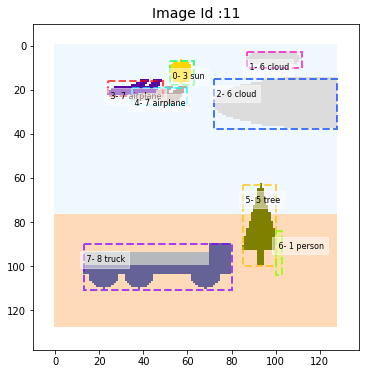

In [161]:
# pp.pprint(dataset_test.image_info[20]['shapes'])
show_id = 11
pp.pprint(dataset_test.image_info[show_id]['shapes'])
vis.display_image_gt(dataset_test, dataset_test.config, show_id, size=6, verbose = True)

## Helper functions 

In [6]:
np_format = {'float': lambda x: "%10.4f" % x, 'int': lambda x: "%8d" % x}
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format), 

(None,)

In [62]:
def plot_fcn_score_curves(x_y_dim, fcn_scores, mrcnn_scores, class_names, ax = None , min_x = 0.0, title = None):
    if ax is None:
        plt.figure(figsize=(10,5))
        ax = plt.gca()

    # scores is always passed ffom plot_mAP_by_scores, so it's nver None
    # so we loop on scores instead of sorted(class_data)
    # for idx, score_key in enumerate(sorted(class_data)):
    for idx, cls  in enumerate(fcn_scores):
        ax.plot(x_y_dim, fcn_scores[cls], label= cls + ' - FCN score')
        # if  scores is not None and score_key not in  scores:
            # continue        
#         print('score_key is: {:20s} iou: {:6.3f}  avg_prec: {:10.4f}'.format(score_key,  iou_key, class_data[score_key][iou_key]['avg_prec']))
#         score_keys.append(score_key)
#         avg_precs[score_key] = class_data[score_key][iou_key]['avg_prec']
#         precisions = class_data[score_key][iou_key]['precisions']
#         recalls    = class_data[score_key][iou_key]['recalls']
#         label      = '{:15s}'.format(score_key)
        
#         score_idx  = scores.index(score_key)
#         print('idx: ', idx, ' Score_key: ' , score_key, 'Score Index: ' , score_idx, 'color:', SCORE_COLORS[score_key])
    
    for idx, cls  in enumerate(mrcnn_scores):
        ax.plot(x_y_dim, mrcnn_scores[cls], label= cls + ' - MR-CNN score')
        
    print(' y limit:', plt.ylim(), ' xlimit : ', plt.xlim())

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Object displacement from origin axis', fontsize= 12)
    ax.set_ylabel('FCN Score', fontsize= 12)
    ax.tick_params(axis='both', labelsize = 10)
#     ax.set_xlim([min_x,1.05])
#     ax.set_ylim([all_scores.min()-0.05, all_scores.max()+0.05])
    leg = plt.legend(loc='lower left',frameon=True, fontsize = 10, markerscale = 6)
    leg.set_title(' Scores ',prop={'size':11})
    plt.grid(True)
#     for xval in np.linspace(0.0, 1.0, 11):
#         plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed', linewidth=1)

def plot_fcn_score_curves_1(x_y_dim, cls_scores, cls_name, ax = None , min_x = 0.0, title = None):

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Object displacement from origin axis', fontsize= 12)
    ax.set_ylabel('FCN Score', fontsize= 12)
    ax.tick_params(axis='both', labelsize = 10)
#     ax.set_xlim([min_x,1.05])
#     ax.set_ylim([all_scores.min()-0.05, all_scores.max()+0.05])
    leg = plt.legend(loc='lower left',frameon=True, fontsize = 10, markerscale = 6)
    leg.set_title(' Scores ',prop={'size':11})
    plt.grid(True)
#     for xval in np.linspace(0.0, 1.0, 11):
#         plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed', linewidth=1)


def save_results(results, save_path, save_file):
    print(' Save to output file: ',save_path, save_file)
    np.savez_compressed(os.path.join(save_path, save_file),     
                    imgs_one_gt        = results['imgs_one_gt'], 
                    imgs_one_dt        = results['imgs_one_dt'],  
                    gt_cls_counts      = results['gt_cls_counts'], 
                    dt_cls_counts      = results['dt_cls_counts'],
                    gt_ttl_img_by_inst = results['gt_ttl_img_by_inst'],
                    dt_ttl_img_by_inst = results['dt_ttl_img_by_inst'],
                    sav_pr_min         = results['sav_pr_min']  ,
                    sav_pr_max         = results['sav_pr_max']  , 
                    sav_fcn_min        = results['sav_fcn_min'] , 
                    sav_fcn_max        = results['sav_fcn_max'] ,                     
                    pr_agg_hm          = results['pr_agg_hm']  ,
                    fcn_agg_hm         = results['fcn_agg_hm']  ,
                    pr_agg_hm_clipped  = results['pr_agg_hm_clipped'],
                    fcn_agg_hm_clipped = results['fcn_agg_hm_clipped'],
                    orig_scores        = results['orig_scores'],
                    fcn_scores         = results['fcn_scores'],
                    pr_scores          = results['pr_scores'])     
    return 0


def display_results(results):
    np_format = {}
    np_format['float']  = lambda x: "%10.4f" % x
    np_format['int']    = lambda x: "%6d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
    
    print()
    print(' Final Results:')
    print('---------------')
    print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(results['sav_pr_min'], results['sav_pr_max']))
    print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(results['sav_fcn_min'], results['sav_fcn_max']))
    print()
    print(' images with one gt object:', results['imgs_one_gt'], '  one detection from MR-CNN:', results['imgs_one_dt'])
    print(' Ground Truth by class    :', results['gt_cls_counts'])
    print(' Detections by class      :', results['dt_cls_counts'])
    print()
    print(' Original Heatmap:')
    print(' ----------------')
    print('    pr_hm mins: ',np.min(results['pr_agg_hm'] , axis=(0,1)))
    print('          maxs: ',np.max(results['pr_agg_hm'] , axis=(0,1)))
    print()
    print('   fcn_hm mins: ',np.min(results['fcn_agg_hm'], axis=(0,1)))
    print('          maxs: ',np.max(results['fcn_agg_hm'], axis=(0,1)))
    print()
    print('   pr_hm sums : ',np.sum(results['pr_agg_hm'] , axis=(0,1)))
    print('   fcn_hm sums: ',np.sum(results['fcn_agg_hm'], axis=(0,1)))
    print()
    print(' Clipped Heatmap:')
    print(' ----------------')
    print('   pr_hm mins : ',np.min(results['pr_agg_hm_clipped'], axis=(0,1)))
    print('         maxs : ',np.max(results['pr_agg_hm_clipped'], axis=(0,1)))
    print('  fcn_hm mins : ',np.min(results['fcn_agg_hm_clipped'], axis=(0,1)))
    print('         maxs : ',np.max(results['fcn_agg_hm_clipped'], axis=(0,1)))
    print('   pr_hm sums : ',np.sum(results['pr_agg_hm_clipped'], axis=(0,1)))
    print('  fcn_hm sums : ',np.sum(results['fcn_agg_hm_clipped'], axis=(0,1)))

    print('\n gt_ttl_img_by_inst', results['gt_ttl_img_by_inst'].shape)
    print(' ------------------')
    print(results['gt_ttl_img_by_inst'][:,:16])
    print('\n dt_ttl_img_by_inst : ', results['dt_ttl_img_by_inst'].shape)
    print(' ------------------')
    print(results['dt_ttl_img_by_inst'][:,:16])
    return(0)

def aggregate_results(fcn_results, results, cx = None, cy= None):
    import mrcnn.score_columns
    r = fcn_results[0]
        
    gt_inst_per_class = np.bincount(np.abs(r['gt_class_ids']), minlength = NUM_CLASSES)
    dt_inst_per_class = np.bincount(r['class_ids']           , minlength = NUM_CLASSES)

    results['gt_cls_counts'] += gt_inst_per_class
    results['dt_cls_counts'] += dt_inst_per_class

    for i in range(NUM_CLASSES):
        results['gt_ttl_img_by_inst'][i,gt_inst_per_class[i]] += 1
        results['dt_ttl_img_by_inst'][i,dt_inst_per_class[i]] += 1


    if len(r['class_ids']) == 1: 
        results['imgs_one_dt'] += 1
    if len(r['gt_class_ids']) == 1:
        results['imgs_one_gt'] += 1

    fcn_hm_max   = np.max(r['fcn_hm'])
    fcn_hm_min   = np.min(r['fcn_hm'])
    pr_hm_max    = np.max(r['pr_hm'])
    pr_hm_min    = np.min(r['pr_hm'])
    
    if fcn_hm_max > results['sav_fcn_max'] :
        results['sav_fcn_max'] = fcn_hm_max

    if fcn_hm_min < results['sav_fcn_min'] :
        results['sav_fcn_min'] = fcn_hm_min

    if pr_hm_max > results['sav_pr_max']:
        results['sav_pr_max'] = pr_hm_max

    if pr_hm_min > results['sav_pr_min']:
        results['sav_pr_min'] = pr_hm_min
    
    results['pr_agg_hm']          += r['pr_hm']
    results['fcn_agg_hm']         += r['fcn_hm']
    results['pr_agg_hm_clipped']  += np.clip(r['pr_hm'], 0.0, 1.0)
    results['fcn_agg_hm_clipped'] += np.clip(r['fcn_hm'], 0.0, 1.0)
    
#     if cx is not None:
#         print(r['pr_scores'])
#         print(r['fcn_scores'])
    for row in r['fcn_scores'][::-1]:
        cls = int(row[CLASS_COLUMN])
#             print(' Class: {:d}   fcn_score_1 {}  fcn_score_2 {}'.format(
#                 cls, row[SCORE_1_COLUMN], row[SCORE_2_COLUMN]))
        results['fcn_scores'][0, cls,cx,cy] = row[SCORE_1_COLUMN]
        results['fcn_scores'][1, cls,cx,cy] = row[SCORE_2_COLUMN]

    for row in r['pr_scores'][::-1]:
        cls = int(row[CLASS_COLUMN])
#             print(' Class: {:d}  mrcnn_scr_1 {} mrcn_score_2 {}'.format(
#                 cls, row[SCORE_1_COLUMN], row[SCORE_2_COLUMN]))
        results['pr_scores'][0, cls,cx,cy] = row[SCORE_1_COLUMN]
        results['pr_scores'][1, cls,cx,cy] = row[SCORE_2_COLUMN]
    
    for row in r['pr_scores'][::-1]:
        cls = int(row[CLASS_COLUMN])
#             print(' Class: {:d}  mrcnn_scr_1 {} mrcn_score_2 {}'.format(
#                 cls, row[SCORE_1_COLUMN], row[SCORE_2_COLUMN]))
        results['orig_scores'][0, cls,cx,cy] = row[ORIG_SCORE_COLUMN]
        
    
    return results

## Heatmap aggregation over a number of images

### Load weight file

In [5]:
# MRCNN_DIR_WEIGHTS =  'F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000'
MRCNN_DIR_WEIGHTS = '/home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000'
# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
mrcnn_files   = ['mrcnn_0001.h5', 'mrcnn_0020.h5', 'mrcnn_0041.h5', 'mrcnn_0060.h5',
                 'mrcnn_0092.h5', 'mrcnn_0116.h5', 'mrcnn_0154.h5', 'mrcnn_0174.h5',
                 'mrcnn_0201.h5', 'mrcnn_0223.h5', 'mrcnn_0243.h5', 'mrcnn_0332.h5']

MRCNN_FILE_IDX = -2
mrcnn_weights_file = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[MRCNN_FILE_IDX])
print("Loading weights ", mrcnn_weights_file)
mrcnn_model.load_model_weights(mrcnn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0243.h5 
MRCNN  MODEL Load weight file COMPLETE 


In [6]:
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
# fcn_files = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#              'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#              'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#              'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#               'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']
FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000'
fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
              'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
              'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
              'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
              'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
              'fcn_0077.h5', 'fcn_0089.h5', 'fcn_0170.h5', 'fcn_0177.h5',
              'fcn_0253.h5', 'fcn_0266.h5']  ## 22,23,24,25
FILE_IDX = -1
fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", fcn_weights_file)
fcn_model.load_model_weights(fcn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 
FCN  MODEL Load weight file COMPLETE 


## Image 79 : move various objects over the spatial extent of image 

 Image_id    :  79  Reference:  [('airplane', (215.0, 217.0, 161.0), (31, 23, 16, 6)), ('person', (240.0, 230.0, 140.0), (50, 86, 1, 9))] Coco Id: 79
 Image meta  :  [ 79 128 128   3   0   0 128 128   1   1]
 Class ids   :  (2,)    [7 1]
 Class Names :  ['airplane', 'person']


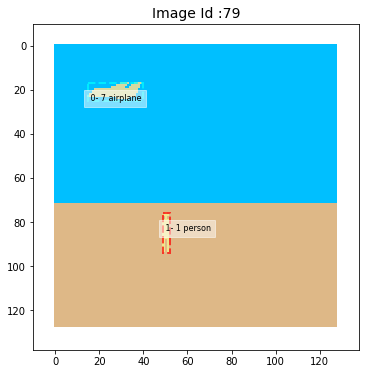

In [7]:
image_id = 79
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

[('car', (150.0, 174.0, 8.0), (87, 90, 22, 11))]
 Image_id    :  79  Reference:  [('car', (150.0, 174.0, 8.0), (87, 90, 22, 11))] Coco Id: 79
 Image meta  :  [ 79 128 128   3   0   0 128 128   1   1]
 Class ids   :  (1,)    [2]
 Class Names :  ['car']


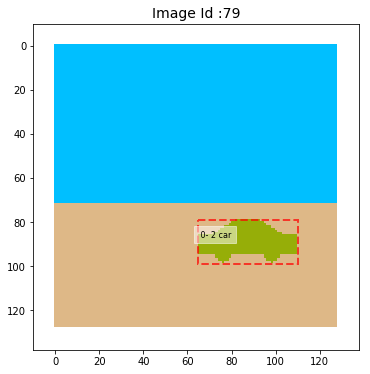

In [8]:
image_id = 79
black = (0,0,0)
yellow = (255.0, 215.0, 0.0)
car_color = (150.0, 174.0, 8.0)
# new_obj = ('car', (150.0, 174.0, 8.0), (cx, cy, 22, 11))     ## image 79 - move car around 
# new_obj = ('sun', (0.0, 0.0, 0.0), (cx, cy, 4, 4))             ## image 18  - moving sun - black
# new_obj = ('sun', (255.0, 215.0, 0.0), (cx, cy, 4, 4))         ## image 18 - moving sun - color
# new_obj = ('building', (0.0, 0.0, 0.0), (cx, cy, 16, 16))      ## image 67 - moving building
# new_obj = ('airplane', (0.0, 0.0, 0.0), (cx, cy, 16, 6))       ## image 67 - moving airplane - black
# new_obj = ('airplane', (215.0, 217.0, 161.0), (cx, cy, 16, 6)) ## image 67 - moving airplane - color
# new_obj = ('sun', (0.0, 0.0, 0.0), (cx, cy, 6, 6))             ## image 67 - moving sun - color
# new_obj = ('sun', (255.0, 215.0, 0.0), (cx, cy, 6, 6))         ## image 67 - moving sun - color
# new_obj = ('airplane', (200.0, 132.0, 126.0), (cx, cy, 18, 7))       ## IMAGE 77 - moving airplane color
# new_obj = ('car', (200.0, 132.0, 126.0), (cx, cy, 16, 7))          ## IMAGE 77 - moving car color
# new_obj = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))    ## image 77 - moving truck

### Image 79 orig objects : [('airplane', (215.0, 217.0, 161.0), (31, 23, 16, 6)), ('person', (240.0, 230.0, 140.0), (50, 86, 1, 9))]
# new_obj = ('airplane', (215.0, 217.0, 161.0), (15, 15, 16, 6))
# airplane = ('airplane', (200.0, 132.0, 126.0), (60, 30, 18, 7))
car = ('car', (150.0, 174.0, 8.0), (87, 90, 22, 11))
person = ('person', (240.0, 230.0, 140.0), (50, 86, 2, 10))
# sun = ('sun', (0.0, 0.0, 0.0), (cx, cy, 6, 6))     
sun = ('sun', yellow, (64, 64, 7, 7))
# building = ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20))
building = ('building', black, (92, 60, 19, 15))
# tree = ('tree', (85.0, 107.0, 47.0), (19, 84, 8, 19))
tree = ('tree', black, (19, 84, 9, 21))
# cloud     = ('cloud', (192.0, 192.0, 192.0), (64, 64,26, 6))
cloud     = ('cloud', black, (64, 64, 35, 7))
airplane = ('airplane', (215.0, 217.0, 161.0), (64, 64, 21, 8))
# truck = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))
# truck = ('truck', (101.0, 98.0, 151.0), (46, 101, 33, 11))
truck = ('truck', black, (46, 101, 33, 11))


# del dataset_test.image_info[image_id]['shapes']
dataset_test.image_info[image_id]['shapes'] = []
# dataset_test.image_info[image_id]['shapes'].append(person)
dataset_test.image_info[image_id]['shapes'].append(car)
# dataset_test.image_info[image_id]['shapes'].append(sun)
# dataset_test.image_info[image_id]['shapes'].append(building)
# dataset_test.image_info[image_id]['shapes'].append(tree)
# dataset_test.image_info[image_id]['shapes'].append(cloud)
# dataset_test.image_info[image_id]['shapes'].append(airplane)
# dataset_test.image_info[image_id]['shapes'].append(truck)
#  

print(dataset_test.image_info[image_id]['shapes'])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = True) 

### Run person over image : Run `compute_ap` over images

1 [('car', (150.0, 174.0, 8.0), (126, 126, 16, 8))]
deleted
[('car', (0, 0, 0), (64, 64, 16, 8))]


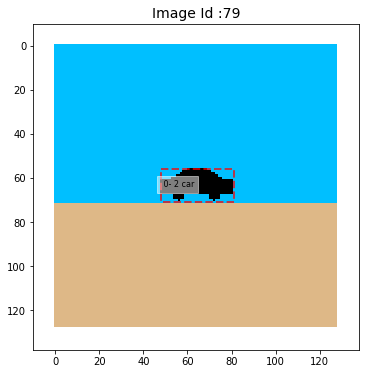

In [20]:
print(len(dataset_test.image_info[image_id]['shapes']), dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
# new_obj = ('person', black, (50, 86, 2, 10))
new_obj = ('car', black, (64, 64, 16, 8))    
# new_obj = ('car', car_color, (64, 64, 16, 8))       
# new_obj = ('sun', yellow, (64, 64, 7, 7))
# new_obj = ('sun'   , black, (64, 64, 7, 7))
# new_obj = ('building', black, (64, 64, 19, 15))
# new_obj = ('tree', black, (19, 84, 9, 21))
# new_obj =  ('cloud', black, (64, 64, 35, 7))
# new_obj  = ('airplane', black, (64, 64, 22, 9))
# new_obj = ('truck', black, (46, 101, 33, 11))

dataset_test.image_info[image_id]['shapes'].append(new_obj)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])

In [21]:
save_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes_2/other"
epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
mrcnn_epochs = mrcnn_files[MRCNN_FILE_IDX].split('_')[1].replace('.h5','')

exp_prfx = 'exp5'
exp_desc = dataset_test.image_info[image_id]['shapes'][0][0]
exp_desc = 'car_black'
save_file =  exp_prfx+'_i'+str(image_id)+'_e'+epochs+'_m'+mrcnn_epochs+'_'+exp_desc+'.npz'
print(' SAVED FILENAME:', save_file)
X_FROM  = 3
X_TO    = 127
Y_FROM  = 3
Y_TO    = 127
STEP_SIZE = 3
NUM_CLASSES = 9
image_id   = 79
X = np.arange(X_FROM, X_TO, STEP_SIZE)
Y = np.arange(Y_FROM, Y_TO, STEP_SIZE)
X = np.arange(X_FROM, X_TO, STEP_SIZE)
Y = np.arange(Y_FROM, Y_TO, STEP_SIZE)
X,Y = np.meshgrid(X,Y)
print(X.shape, Y.shape)

 SAVED FILENAME: exp5_i79_e0266_m0243_car_black.npz
(42, 42) (42, 42)


1 [('car', (0, 0, 0), (64, 64, 16, 8))]
 Shapes Array Cleared
[('car', (0, 0, 0), (64, 64, 16, 8))]


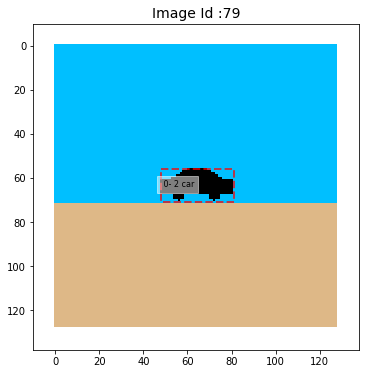

In [22]:
print(len(dataset_test.image_info[image_id]['shapes']), dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print(' Shapes Array Cleared')
    
dataset_test.image_info[image_id]['shapes'].append(new_obj)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])

-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 
FCN  MODEL Load weight file COMPLETE 
 Weight files used         :  /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 fcn epochs: 0266  mrcnn_epochs: 0243
 Results will be written to:  exp5_i79_e0266_m0243_car_black.npz
 fcn_scores :  (2, 9, 42, 42) (2, 9, 42, 42)
==> Calculate Heatmap aggregates for image_id :  79
x/y:  9 9  cx  30 cy: 30
x/y:  19 9  cx  30 cy: 60
x/y:  29 9  cx  30 cy: 90
x/y:  39 9  cx  30 cy: 120
x/y:  9 19  cx  60 cy: 30
x/y:  19 19  cx  60 cy: 60
x/y:  29 19  cx  60 cy: 90
x/y:  39 19  cx  60 cy: 12

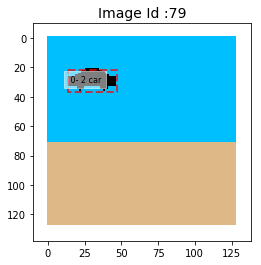

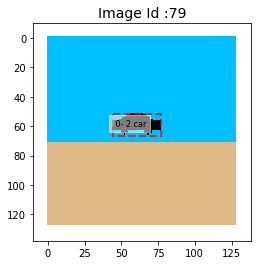

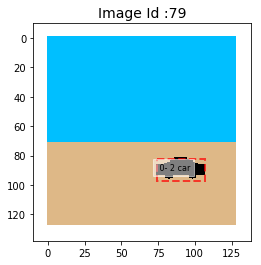

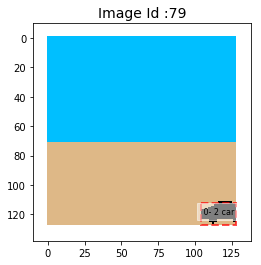

In [23]:
for FILE_IDX in [  25 ]:    
    fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
    fcn_model.load_model_weights(fcn_weights_file)
    
    epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
    mrcnn_epochs = mrcnn_files[MRCNN_FILE_IDX].split('_')[1].replace('.h5','')
    save_file =  exp_prfx+'_i'+str(image_id)+'_e'+epochs+'_m'+mrcnn_epochs+'_'+exp_desc+'.npz'

    print(' Weight files used         : ', fcn_weights_file, 'fcn epochs:', epochs, ' mrcnn_epochs:', mrcnn_epochs)
    print(' Results will be written to: ', save_file)
    
    ###  Initialize data structures 
    failed_predicts = 0
    results = exp.intialize_results(128, NUM_CLASSES, X ,Y)
    print(' fcn_scores : ', results['fcn_scores'].shape, results['pr_scores'].shape)

    print('==> Calculate Heatmap aggregates for image_id : ', image_id)
    for y in range(Y.shape[1]):
        for x in range(X.shape[0]):    
            cx = X[x,y]
            cy = Y[x,y]
            if (cx % 30 == 0) & (cy % 30 == 0):
                print('x/y: ', x,y, ' cx ', cx , 'cy:', cy)

#             new_obj = ('person', black, (cx, cy, 2, 10)) 
#             new_obj = ('car', car_color, (cx, cy, 16, 8))       
            new_obj = ('car', black, (cx, cy, 16, 8)) 
#             new_obj = ('sun'   , yellow, (cx, cy, 7, 7))
#             new_obj = ('sun'   , black, (cx, cy, 7, 7))
#             new_obj = ('building', black, (cx, cy, 19, 15))
#             new_obj = ('tree', black, (cx, cy, 9, 21))
#             new_obj =  ('cloud', black, (cx, cy, 35, 7))
#             new_obj  = ('airplane', black, (cx, cy, 22, 9))
#             new_obj = ('truck', black, (cx, cy, 33, 11))
            
            dataset_test.image_info[image_id]['shapes'][0]  = new_obj
            
#             if cx % 15 == 0 and cy % 15 == 0:
            if cx == cy and cx % 30 == 0  :
                vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=4, verbose = False)
        
            try:
                fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# ###                 fcn_results = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
            except Exception as e :
                failed_predicts += 1
                print('    failure on mrcnn predict - image id: {} at cx:{} cy:{}    total failures: {}'.format(image_id, cx, cy, failed_predicts))
            else:    
                results = exp.aggregate_results(fcn_results, results, x, y)
                pass

            
        
    exp.save_results(results, save_path, save_file)
    exp.display_results(results)

    print('\n\n Agg heatmap Calcs completed for epoch:', epochs , ' (Weight files:', mrcnn_weights_file, fcn_weights_file, ')')
    print(' Written to :', save_path, save_file)
    print(' Total failed :', failed_predicts)

## Image 94 : move various objects over the spatial extent of image 

 Image_id    :  94  Reference:  [('sun', (255.0, 255.0, 0.0), (43, 9, 4, 4)), ('cloud', (119.0, 136.0, 153.0), (24, 15, 19, 6)), ('cloud', (211.0, 211.0, 211.0), (120, 28, 35, 11)), ('building', (87.0, 184.0, 147.0), (75, 38, 13, 25)), ('building', (167.0, 114.0, 195.0), (40, 44, 20, 23)), ('tree', (154.0, 205.0, 50.0), (72, 65, 8, 19)), ('tree', (0.0, 128.0, 0.0), (51, 76, 11, 27)), ('tree', (107.0, 142.0, 35.0), (95, 76, 11, 27)), ('car', (12.0, 132.0, 96.0), (120, 113, 24, 12))] Coco Id: 94
 Image meta  :  [ 94 128 128   3   0   0 128 128   1   1]
 Class ids   :  (9,)    [3 6 6 4 4 5 5 5 2]
 Class Names :  ['sun', 'cloud', 'cloud', 'building', 'building', 'tree', 'tree', 'tree', 'car']


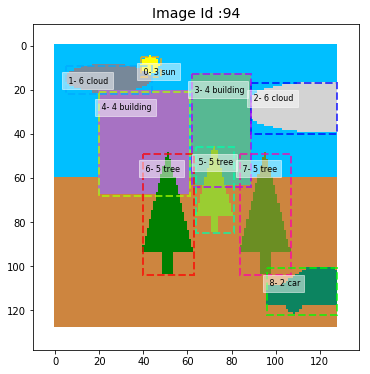

In [10]:
image_id = 94
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

[('car', (150.0, 174.0, 8.0), (87, 90, 22, 11))]
 Image_id    :  94  Reference:  [('car', (150.0, 174.0, 8.0), (87, 90, 22, 11))] Coco Id: 94
 Image meta  :  [ 94 128 128   3   0   0 128 128   1   1]
 Class ids   :  (1,)    [2]
 Class Names :  ['car']


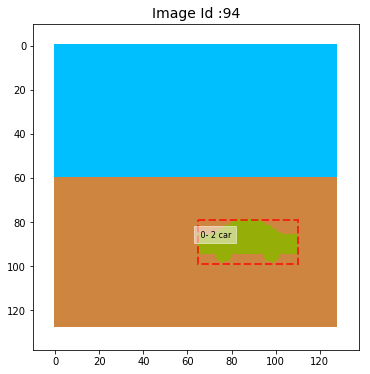

In [11]:

black = (0,0,0)
yellow = (255.0, 215.0, 0.0)
car_color = (150.0, 174.0, 8.0)
# new_obj = ('car', (150.0, 174.0, 8.0), (cx, cy, 22, 11))     ## image 79 - move car around 
# new_obj = ('sun', (0.0, 0.0, 0.0), (cx, cy, 4, 4))             ## image 18  - moving sun - black
# new_obj = ('sun', (255.0, 215.0, 0.0), (cx, cy, 4, 4))         ## image 18 - moving sun - color
# new_obj = ('building', (0.0, 0.0, 0.0), (cx, cy, 16, 16))      ## image 67 - moving building
# new_obj = ('airplane', (0.0, 0.0, 0.0), (cx, cy, 16, 6))       ## image 67 - moving airplane - black
# new_obj = ('airplane', (215.0, 217.0, 161.0), (cx, cy, 16, 6)) ## image 67 - moving airplane - color
# new_obj = ('sun', (0.0, 0.0, 0.0), (cx, cy, 6, 6))             ## image 67 - moving sun - color
# new_obj = ('sun', (255.0, 215.0, 0.0), (cx, cy, 6, 6))         ## image 67 - moving sun - color
# new_obj = ('airplane', (200.0, 132.0, 126.0), (cx, cy, 18, 7))       ## IMAGE 77 - moving airplane color
# new_obj = ('car', (200.0, 132.0, 126.0), (cx, cy, 16, 7))          ## IMAGE 77 - moving car color
# new_obj = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))    ## image 77 - moving truck

### Image 79 orig objects : [('airplane', (215.0, 217.0, 161.0), (31, 23, 16, 6)), ('person', (240.0, 230.0, 140.0), (50, 86, 1, 9))]
# new_obj = ('airplane', (215.0, 217.0, 161.0), (15, 15, 16, 6))
# airplane = ('airplane', (200.0, 132.0, 126.0), (60, 30, 18, 7))
car = ('car', (150.0, 174.0, 8.0), (87, 90, 22, 11))
person = ('person', (240.0, 230.0, 140.0), (50, 86, 2, 10))
# sun = ('sun', (0.0, 0.0, 0.0), (cx, cy, 6, 6))     
sun = ('sun', yellow, (64, 64, 7, 7))
# building = ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20))
building = ('building', black, (92, 60, 19, 15))
# tree = ('tree', (85.0, 107.0, 47.0), (19, 84, 8, 19))
tree = ('tree', black, (19, 84, 9, 21))
# cloud     = ('cloud', (192.0, 192.0, 192.0), (64, 64,26, 6))
cloud     = ('cloud', black, (64, 64, 35, 7))
airplane = ('airplane', (215.0, 217.0, 161.0), (64, 64, 21, 8))
# truck = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))
# truck = ('truck', (101.0, 98.0, 151.0), (46, 101, 33, 11))
truck = ('truck', black, (46, 101, 33, 11))


# del dataset_test.image_info[image_id]['shapes']
dataset_test.image_info[image_id]['shapes'] = []
# dataset_test.image_info[image_id]['shapes'].append(person)
dataset_test.image_info[image_id]['shapes'].append(car)
# dataset_test.image_info[image_id]['shapes'].append(sun)
# dataset_test.image_info[image_id]['shapes'].append(building)
# dataset_test.image_info[image_id]['shapes'].append(tree)
# dataset_test.image_info[image_id]['shapes'].append(cloud)
# dataset_test.image_info[image_id]['shapes'].append(airplane)
# dataset_test.image_info[image_id]['shapes'].append(truck)
#  

print(dataset_test.image_info[image_id]['shapes'])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = True) 

### Run person over image : Run `compute_ap` over images

1 [('car', (150.0, 174.0, 8.0), (126, 126, 16, 8))]
deleted
[('car', (0, 0, 0), (64, 64, 16, 8))]


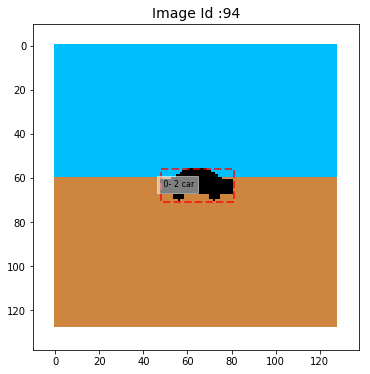

In [19]:
print(len(dataset_test.image_info[image_id]['shapes']), dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print('deleted')
# new_obj = ('person', black, (50, 86, 2, 10))
new_obj = ('car', black, (64, 64, 16, 8))    
# new_obj = ('car', car_color, (64, 64, 16, 8))       
# new_obj = ('sun', yellow, (64, 64, 7, 7))
# new_obj = ('sun'   , black, (64, 64, 7, 7))
# new_obj = ('building', black, (64, 64, 19, 15))
# new_obj = ('tree', black, (19, 84, 9, 21))
# new_obj =  ('cloud', black, (64, 64, 35, 7))
# new_obj  = ('airplane', black, (64, 64, 22, 9))
# new_obj = ('truck', black, (46, 101, 33, 11))

dataset_test.image_info[image_id]['shapes'].append(new_obj)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])

In [20]:
save_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes_2/other"
epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
mrcnn_epochs = mrcnn_files[MRCNN_FILE_IDX].split('_')[1].replace('.h5','')

exp_prfx = 'exp5'
exp_desc = dataset_test.image_info[image_id]['shapes'][0][0]
exp_desc = 'car_black'
save_file =  exp_prfx+'_i'+str(image_id)+'_e'+epochs+'_m'+mrcnn_epochs+'_'+exp_desc+'.npz'
print(' SAVED FILENAME:', save_file)
X_FROM  = 3
X_TO    = 127
Y_FROM  = 3
Y_TO    = 127
STEP_SIZE = 3
NUM_CLASSES = 9
X = np.arange(X_FROM, X_TO, STEP_SIZE)
Y = np.arange(Y_FROM, Y_TO, STEP_SIZE)
X = np.arange(X_FROM, X_TO, STEP_SIZE)
Y = np.arange(Y_FROM, Y_TO, STEP_SIZE)
X,Y = np.meshgrid(X,Y)
print(X.shape, Y.shape)

 SAVED FILENAME: exp5_i94_e0266_m0243_car_black.npz
(42, 42) (42, 42)


1 [('car', (0, 0, 0), (64, 64, 16, 8))]
 Shapes Array Cleared
[('car', (0, 0, 0), (64, 64, 16, 8))]


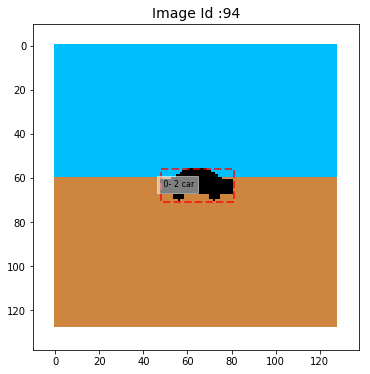

In [21]:
print(len(dataset_test.image_info[image_id]['shapes']), dataset_test.image_info[image_id]['shapes'])
if len(dataset_test.image_info[image_id]['shapes']) > 0:
    dataset_test.image_info[image_id]['shapes'] = []
    print(' Shapes Array Cleared')
    
dataset_test.image_info[image_id]['shapes'].append(new_obj)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
print(dataset_test.image_info[image_id]['shapes'])

-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 
FCN  MODEL Load weight file COMPLETE 
 Weight files used         :  /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 fcn epochs: 0266  mrcnn_epochs: 0243
 Results will be written to:  exp5_i94_e0266_m0243_car_black.npz
 fcn_scores :  (2, 9, 42, 42) (2, 9, 42, 42)
==> Calculate Heatmap aggregates for image_id :  94
x/y:  9 9  cx  30 cy: 30
x/y:  19 9  cx  30 cy: 60
x/y:  29 9  cx  30 cy: 90
x/y:  39 9  cx  30 cy: 120
x/y:  9 19  cx  60 cy: 30
x/y:  19 19  cx  60 cy: 60
x/y:  29 19  cx  60 cy: 90
x/y:  39 19  cx  60 cy: 12

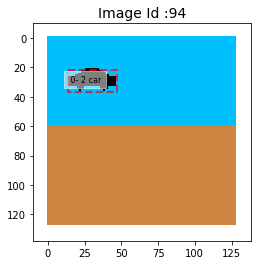

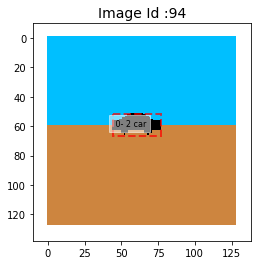

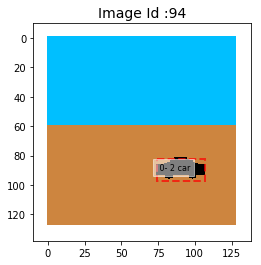

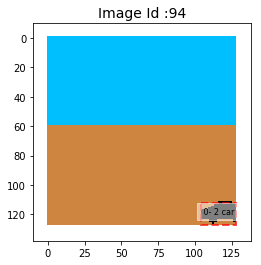

In [22]:
for FILE_IDX in [  25 ]:    
    fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
    fcn_model.load_model_weights(fcn_weights_file)
    
    epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
    mrcnn_epochs = mrcnn_files[MRCNN_FILE_IDX].split('_')[1].replace('.h5','')
    save_file =  exp_prfx+'_i'+str(image_id)+'_e'+epochs+'_m'+mrcnn_epochs+'_'+exp_desc+'.npz'

    print(' Weight files used         : ', fcn_weights_file, 'fcn epochs:', epochs, ' mrcnn_epochs:', mrcnn_epochs)
    print(' Results will be written to: ', save_file)
    
    ###  Initialize data structures 
    failed_predicts = 0
    results = exp.intialize_results(128, NUM_CLASSES, X ,Y)
    print(' fcn_scores : ', results['fcn_scores'].shape, results['pr_scores'].shape)

    print('==> Calculate Heatmap aggregates for image_id : ', image_id)
    for y in range(Y.shape[1]):
        for x in range(X.shape[0]):    
            cx = X[x,y]
            cy = Y[x,y]
            if (cx % 30 == 0) & (cy % 30 == 0):
                print('x/y: ', x,y, ' cx ', cx , 'cy:', cy)

#             new_obj = ('person', black, (cx, cy, 2, 10)) 
#             new_obj = ('car', car_color, (cx, cy, 16, 8))       
            new_obj = ('car', black, (cx, cy, 16, 8)) 
#             new_obj = ('sun'   , yellow, (cx, cy, 7, 7))
#             new_obj = ('sun'   , black, (cx, cy, 7, 7))
#             new_obj = ('building', black, (cx, cy, 19, 15))
#             new_obj = ('tree', black, (cx, cy, 9, 21))
#             new_obj =  ('cloud', black, (cx, cy, 35, 7))
#             new_obj  = ('airplane', black, (cx, cy, 22, 9))
#             new_obj = ('truck', black, (cx, cy, 33, 11))
            
            dataset_test.image_info[image_id]['shapes'][0]  = new_obj
            
#             if cx % 15 == 0 and cy % 15 == 0:
            if cx == cy and cx % 30 == 0  :
                vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=4, verbose = False)
        
            try:
                fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# ###                 fcn_results = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
            except Exception as e :
                failed_predicts += 1
                print('    failure on mrcnn predict - image id: {} at cx:{} cy:{}    total failures: {}'.format(image_id, cx, cy, failed_predicts))
            else:    
                results = exp.aggregate_results(fcn_results, results, x, y)
                pass

            
        
    exp.save_results(results, save_path, save_file)
    exp.display_results(results)

    print('\n\n Agg heatmap Calcs completed for epoch:', epochs , ' (Weight files:', mrcnn_weights_file, fcn_weights_file, ')')
    print(' Written to :', save_path, save_file)
    print(' Total failed :', failed_predicts)

### Display score contour plots

(2, 9, 42, 42)
(2, 9, 42, 42)


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'offset', 'zdir'
  s)


Text(0,0.5,'fcn score')

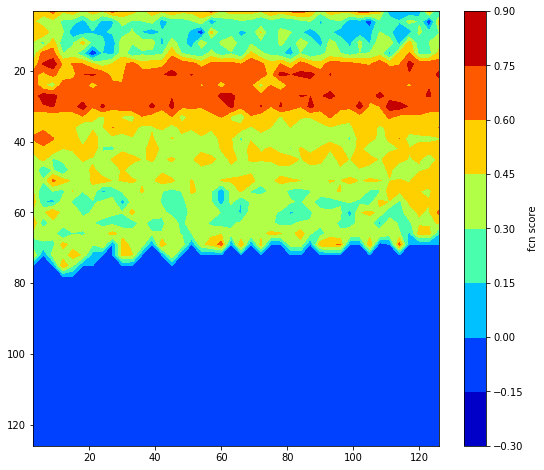

In [285]:
print(results['fcn_scores'].shape)
print(results['pr_scores'].shape)
xx =  results['X']
yy =  results['Y']
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(121)
cset = ax.contourf(X, Y, results['fcn_scores'][0,7], zdir='z', offset=-0.15, cmap=cm.jet)
ax.invert_yaxis()
cbar = fig.colorbar(cset)
cbar.ax.set_ylabel('fcn score')
# Add the contour line levels to the colorbar
# cbar.add_lines(cset)

Text(0,0.5,'FCN Score 2')

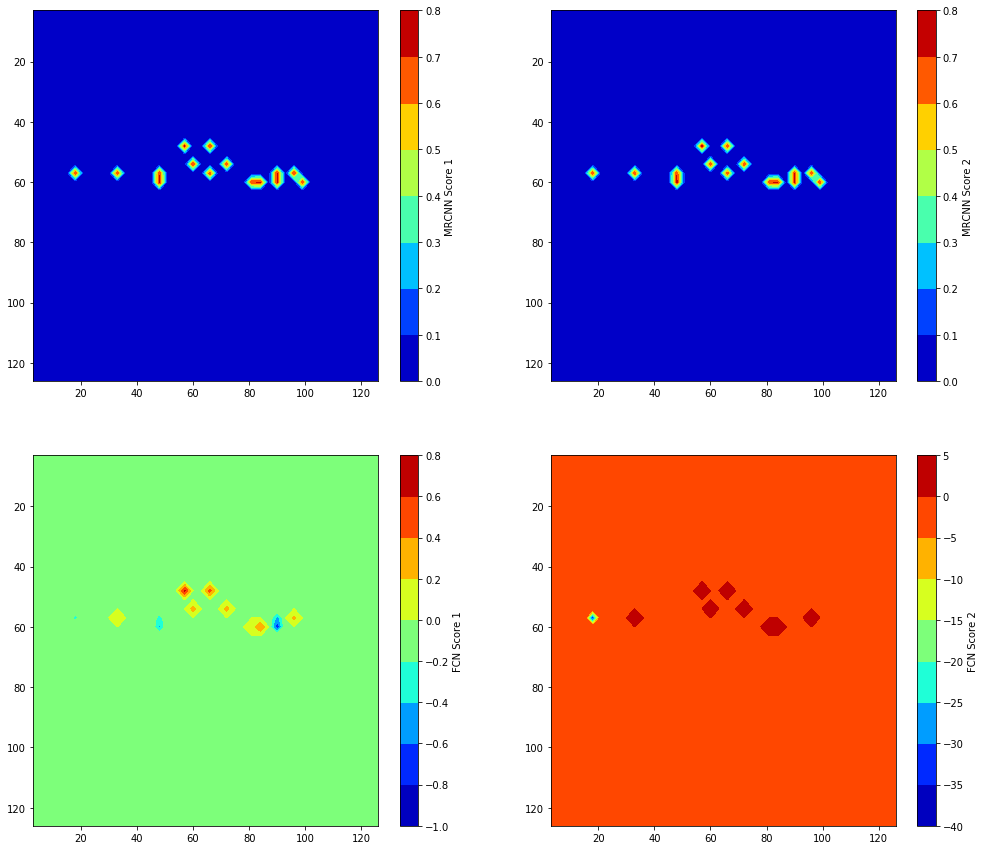

In [311]:
fig = plt.figure(figsize = (17,15))
xx =  results['X']
yy =  results['Y']
ax = fig.add_subplot(221)
cls = 4

cset = ax.contourf(xx,yy,results['pr_scores'][0,cls], cmap=cm.jet) # zdir='z', offset=-0.15,
ax.invert_yaxis()
cbar = fig.colorbar(cset)
cbar.ax.set_ylabel('MRCNN Score 1')

ax = fig.add_subplot(222)
cset = ax.contourf(xx,yy,results['pr_scores'][1,cls], cmap=cm.jet)
ax.invert_yaxis()
cbar = fig.colorbar(cset)
cbar.ax.set_ylabel('MRCNN Score 2')

ax = fig.add_subplot(223)
cset = ax.contourf(xx,yy,results['fcn_scores'][0,cls], cmap=cm.jet)
ax.invert_yaxis()
cbar = fig.colorbar(cset)
cbar.ax.set_ylabel('FCN Score 1')

ax = fig.add_subplot(224)
cset = ax.contourf(xx,yy,results['fcn_scores'][1,cls],  cmap=cm.jet)  #zdir='z', offset=-0.15,
ax.invert_yaxis()
cbar = fig.colorbar(cset)
cbar.ax.set_ylabel('FCN Score 2')

# ax = fig.add_subplot(325)
# diff1 = results['pr_scores'][0] - results['fcn_scores'][0]
# cset = ax.contourf(xx,yy, diff1[cls], cmap=cm.jet)
# ax.invert_yaxis()
# cbar = fig.colorbar(cset)
# cbar.ax.set_ylabel('FCN Score 1')

# ax = fig.add_subplot(326)
# diff2 = results['pr_scores'][1] - results['fcn_scores'][1]
# cset = ax.contourf(xx,yy, diff2[cls], cmap=cm.jet)

# cset = ax.contourf(xx,yy,results['fcn_scores'][1,cls],  cmap=cm.jet)  #zdir='z', offset=-0.15,
# ax.invert_yaxis()
# cbar = fig.colorbar(cset)
# cbar.ax.set_ylabel('FCN Score 2')

# Add the contour line levels to the colorbar
# cbar.add_lines(cset)

In [40]:
# ttl = 'img '+str(image_id)+'  epoch:'+str(epochs) +'  '+ exp_desc 
# 'Img '+str(image_id)+' fcn epoch:'+epochs+' mrcnn_epoch: '+mrcnn_epochs+'_'+exp_desc
# cols = 6
# print(ttl, cols)
# # classes = [1,2,3,4,5,6,7,8]
# classes = [2,3,4,6,7,8]
# _ =vis2.display_score_contours(results['pr_scores'][0] , gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- MRCNN SCORE 1 ', classes = classes)
# _ =vis2.display_score_contours(results['fcn_scores'][0], gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN SCORE 1 ', classes = classes)
# _ =vis2.display_score_contours(results['fcn_scores'][1], gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN_SCORE 2 ', classes = classes)

(9, 1, 1)


../mrcnn/visualize_2.py:905: RuntimeWarning: invalid value encountered in true_divide
  return out
/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


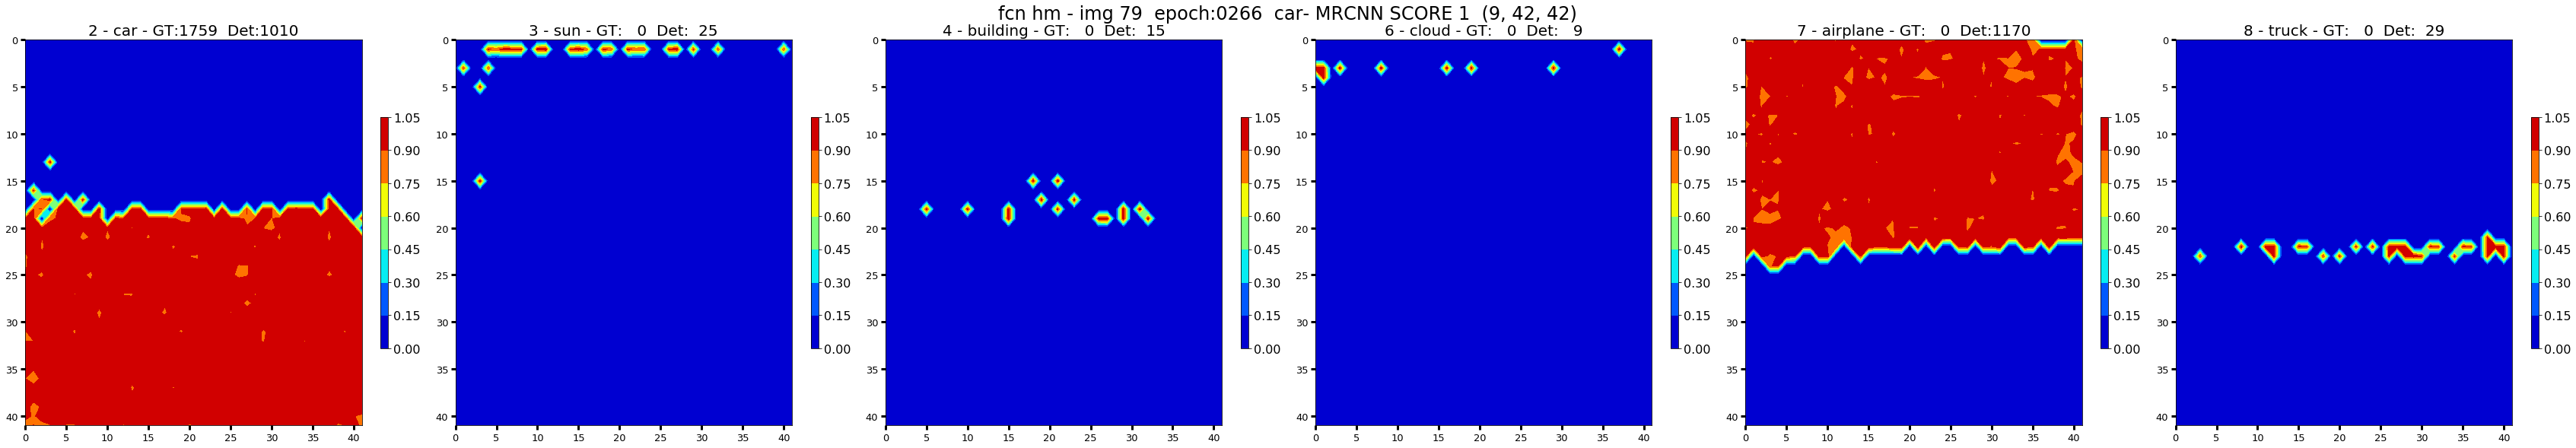

(9, 1, 1)


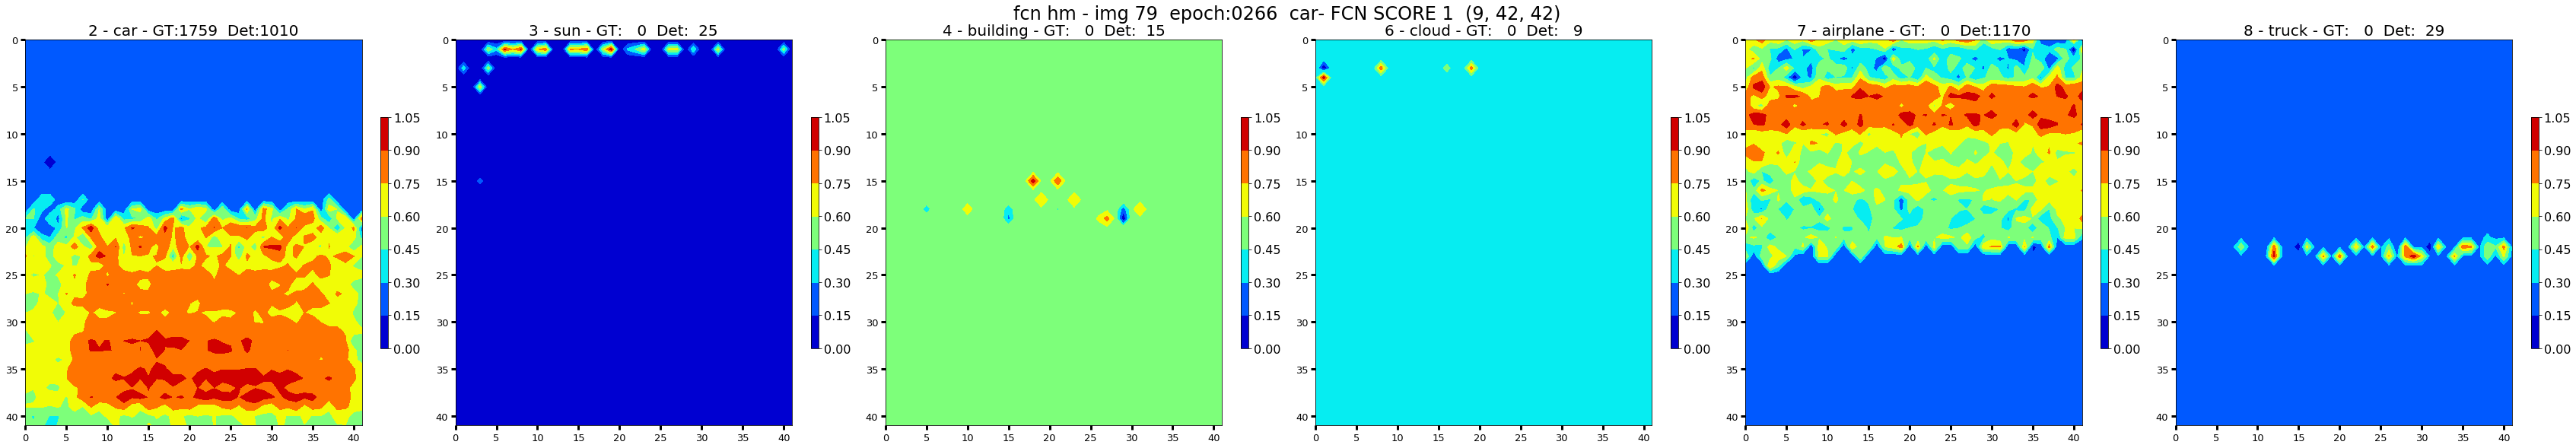

(9, 1, 1)


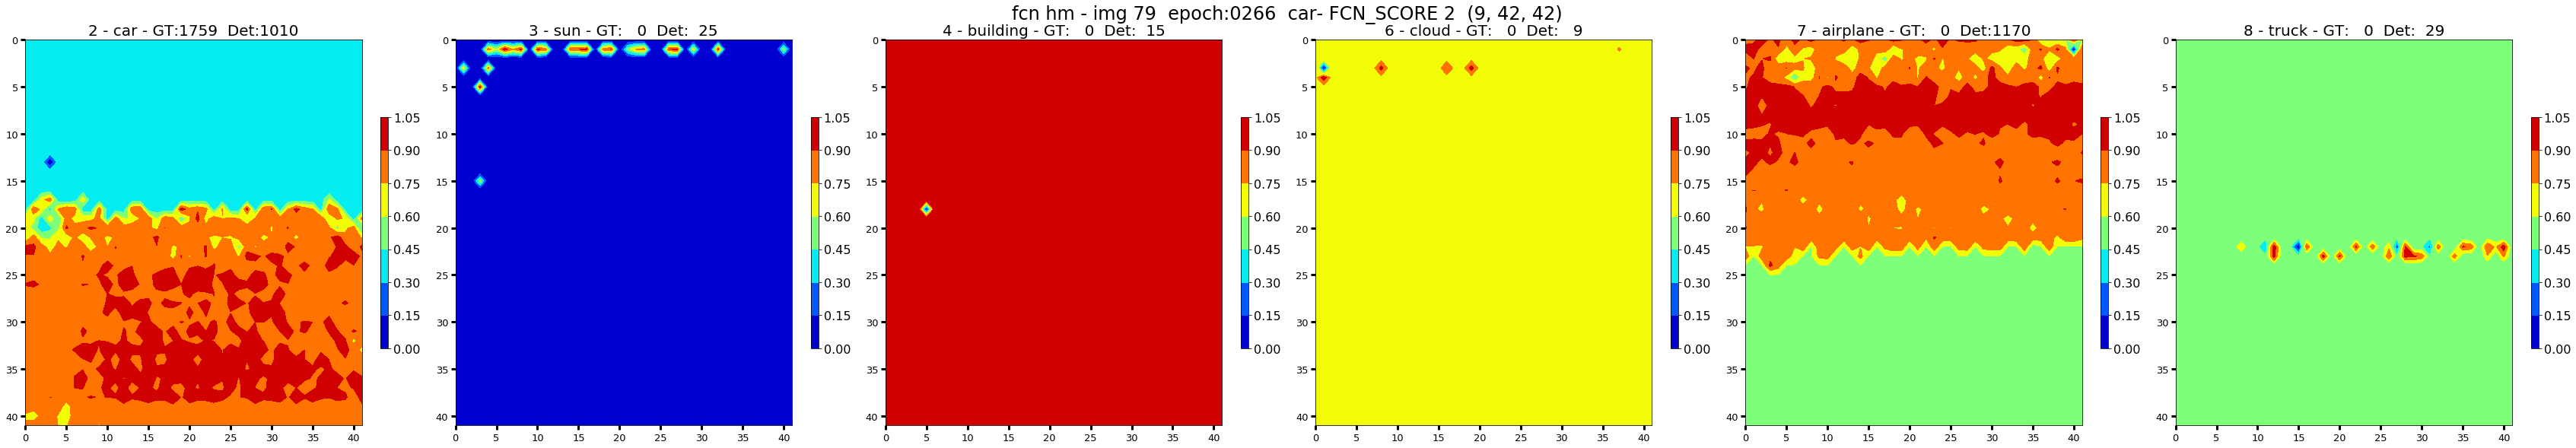

In [306]:
# print(ttl, cols)
# # classes = [1,2,3,4,5,6,7,8],2, keepdims=True
classes = [2,3,4,6,7,8]

# print(results['fcn_scores'][1].shape, p1.shape)
# p1 = np.linalg.norm(results['pr_scores'][0],1, axis = (1,2), keepdims=True)
_ =vis2.display_score_contours(vis2.normalize_fcn_score(results['pr_scores'][0]) , gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- MRCNN SCORE 1 ', classes = classes)
# _ =vis2.display_score_contours(results['pr_scores'][0]/p1 , gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- MRCNN SCORE 1 ', classes = classes)

# p1 = np.linalg.norm(results['fcn_scores'][0],1, axis = (1,2), keepdims=True)
_ =vis2.display_score_contours(vis2.normalize_fcn_score(results['fcn_scores'][0]), gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN SCORE 1 ', classes = classes)
# _ =vis2.display_score_contours(results['fcn_scores'][0]/p1, gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN SCORE 1 ', classes = classes)


# p1 = np.linalg.norm(results['fcn_scores'][1],1, axis = (1,2), keepdims=True)
_ =vis2.display_score_contours(vis2.normalize_fcn_score(results['fcn_scores'][1]), gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN_SCORE 2 ', classes = classes)
# _ =vis2.display_score_contours(results['fcn_scores'][1]/p1, gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN_SCORE 2 ', classes = classes)

### Display FCN output heatmaps for a series of epoch files

In [31]:
# save_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes_2/other"
# exp_prfx = 'exp6'
# exp_desc = 'airplane'
# cols = 9 
# image_id = 79
# classes = [1,2,3,4,5,6,7,8]
exp_desc = 'car_black'
# exp_desc = 'car_color'

epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
mrcnn_epochs = mrcnn_files[MRCNN_FILE_IDX].split('_')[1].replace('.h5','')
load_file =  exp_prfx+'_i'+str(image_id)+'_e'+epochs+'_m'+mrcnn_epochs+'_'+exp_desc+'.npz'
print(' LOAD FILENAME:', load_file)

filename  = os.path.join(save_path, load_file)

if os.path.exists(filename):
    print('  input file: ', filename)
    loaddata = np.load(os.path.join(save_path, load_file))
    pr_agg_hm          = loaddata['fcn_agg_hm']
    pr_agg_hm_clipped  = loaddata['pr_agg_hm_clipped']
    fcn_agg_hm         = loaddata['fcn_agg_hm']
    fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']
    gt_cls_counts      = loaddata['gt_cls_counts']  
    dt_cls_counts      = loaddata['dt_cls_counts'] 
    if 'orig_scores' in loaddata:
        print(' orig_scores exists')
        orig_scores    = loaddata['orig_scores']
    else:
        print('  orig scores doesn''t exist ')
    fcn_scores         = loaddata['fcn_scores']
    pr_scores          = loaddata['pr_scores']
else: 
    print('file not found ', filename)

ttl = 'fcn hm - img '+str(image_id)+'  epoch:'+str(epochs) +'  '+ exp_desc 

 LOAD FILENAME: exp5_i94_e0266_m0243_car_black.npz
  input file:  /home/kbardool/git_projs/mrcnn3/train_newshapes_2/other/exp5_i94_e0266_m0243_car_black.npz
 orig_scores exists


exp5_i94_e0266_m0243_car_color.npz
 Num features:  5 Rows / Columns:  1 5


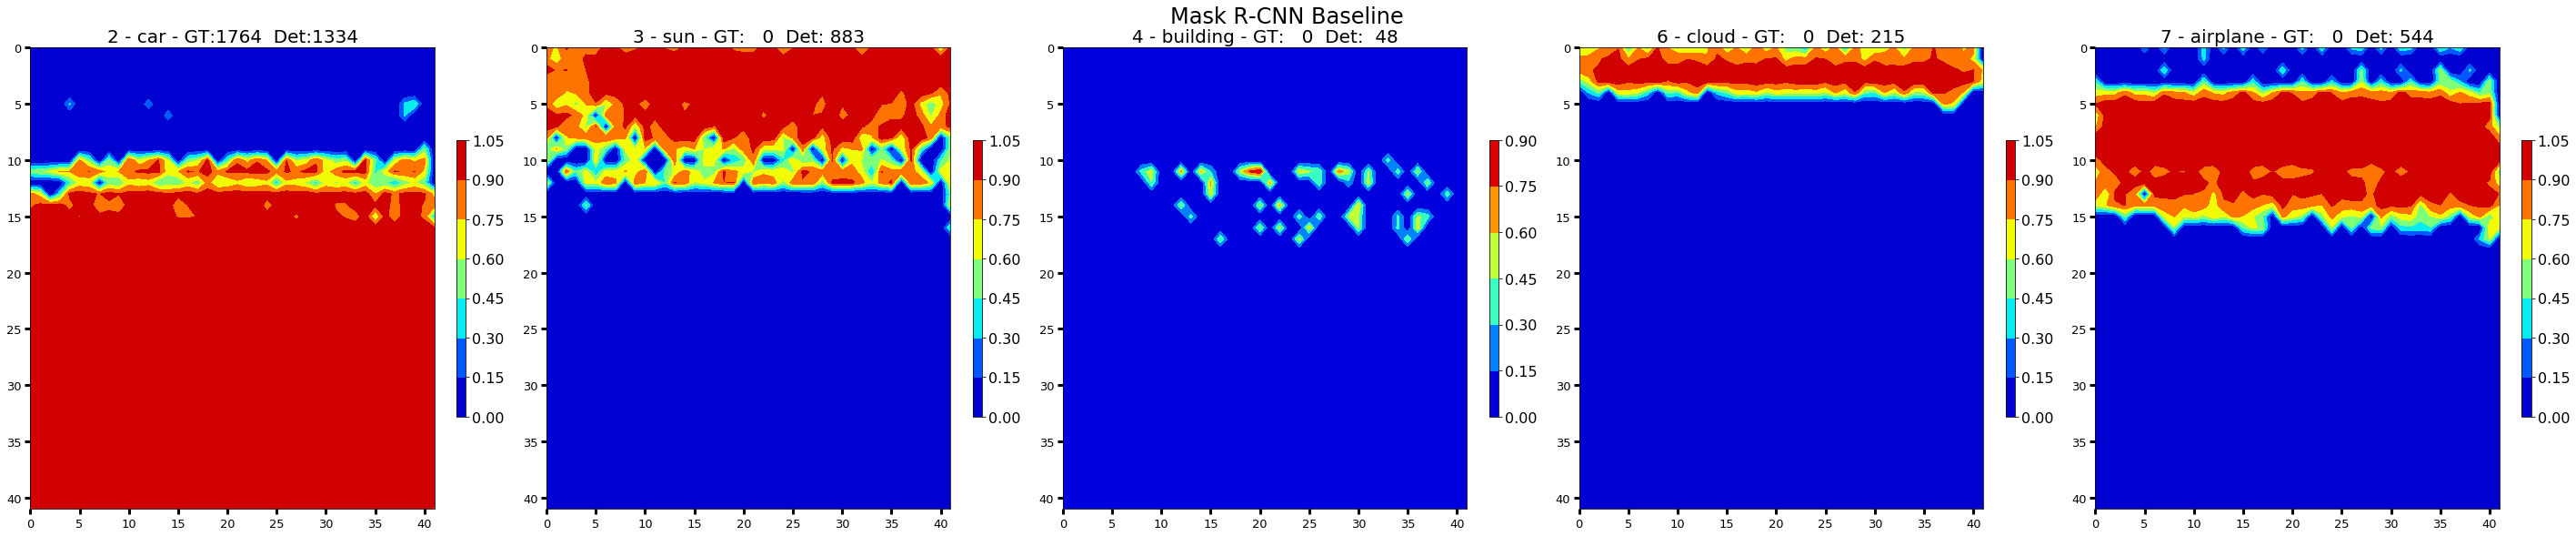

In [30]:
# print(ttl, cols)
classes = [1,2,3,4,5,6,7,8]
# classes = [1,3,4,5,6,7]
# classes = [1,4,5]
classes = [2,3,4,6,7]

print(load_file)
_ =vis2.display_score_contours(orig_scores[0]  , gt_cls_counts, dt_cls_counts, class_names, title ='Mask R-CNN Baseline', classes = classes)
# _ =vis2.display_score_contours(pr_scores[0]  , gt_cls_counts, dt_cls_counts, class_names, title ='MRCNN SCORE 1 ', classes = classes)
# _ =vis2.display_score_contours(fcn_scores[0], gt_cls_counts, dt_cls_counts, class_names, title = 'FCN SCORE 1 ', classes = classes)
# _ =vis2.display_score_contours(fcn_scores[1], gt_cls_counts, dt_cls_counts, class_names, title = 'FCN_SCORE 2 ', classes = classes)

exp5_i94_e0266_m0243_car_black.npz
 Num features:  5 Rows / Columns:  1 5


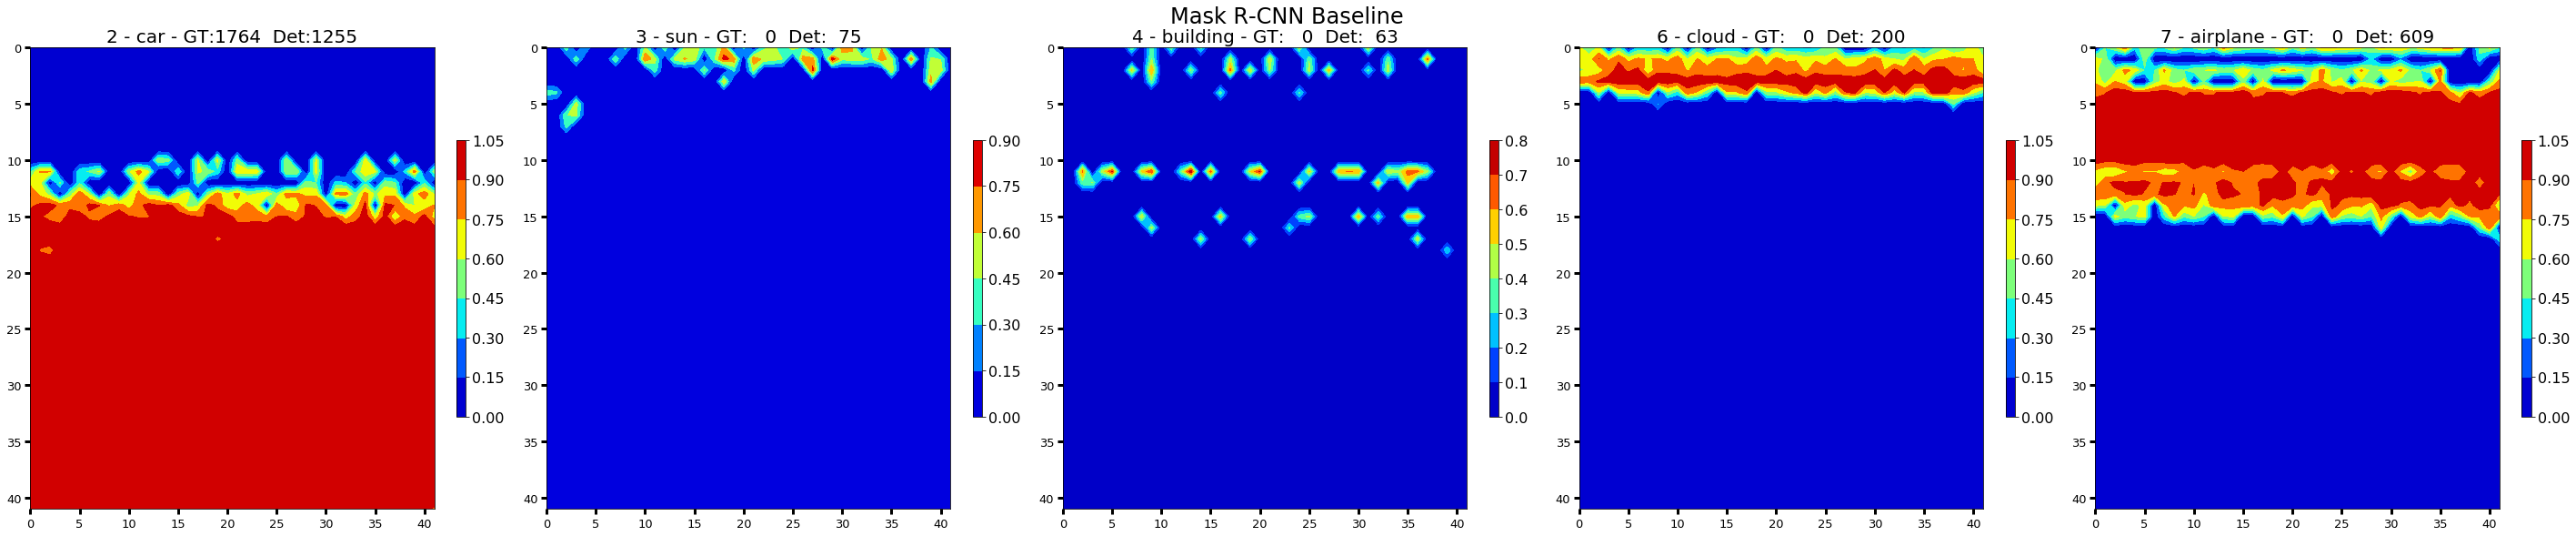

In [32]:
# print(ttl, cols)
classes = [1,2,3,4,5,6,7,8]
# classes = [1,3,4,5,6,7]
# classes = [1,4,5]
classes = [2,3,4,6,7]

print(load_file)
_ =vis2.display_score_contours(orig_scores[0]  , gt_cls_counts, dt_cls_counts, class_names, title ='Mask R-CNN Baseline', classes = classes)
# _ =vis2.display_score_contours(pr_scores[0]  , gt_cls_counts, dt_cls_counts, class_names, title ='MRCNN SCORE 1 ', classes = classes)
# _ =vis2.display_score_contours(fcn_scores[0], gt_cls_counts, dt_cls_counts, class_names, title = 'FCN SCORE 1 ', classes = classes)
# _ =vis2.display_score_contours(fcn_scores[1], gt_cls_counts, dt_cls_counts, class_names, title = 'FCN_SCORE 2 ', classes = classes)

exp6_i79_e0266_m0020_car.npz
 Num features:  8 Rows / Columns:  8 4


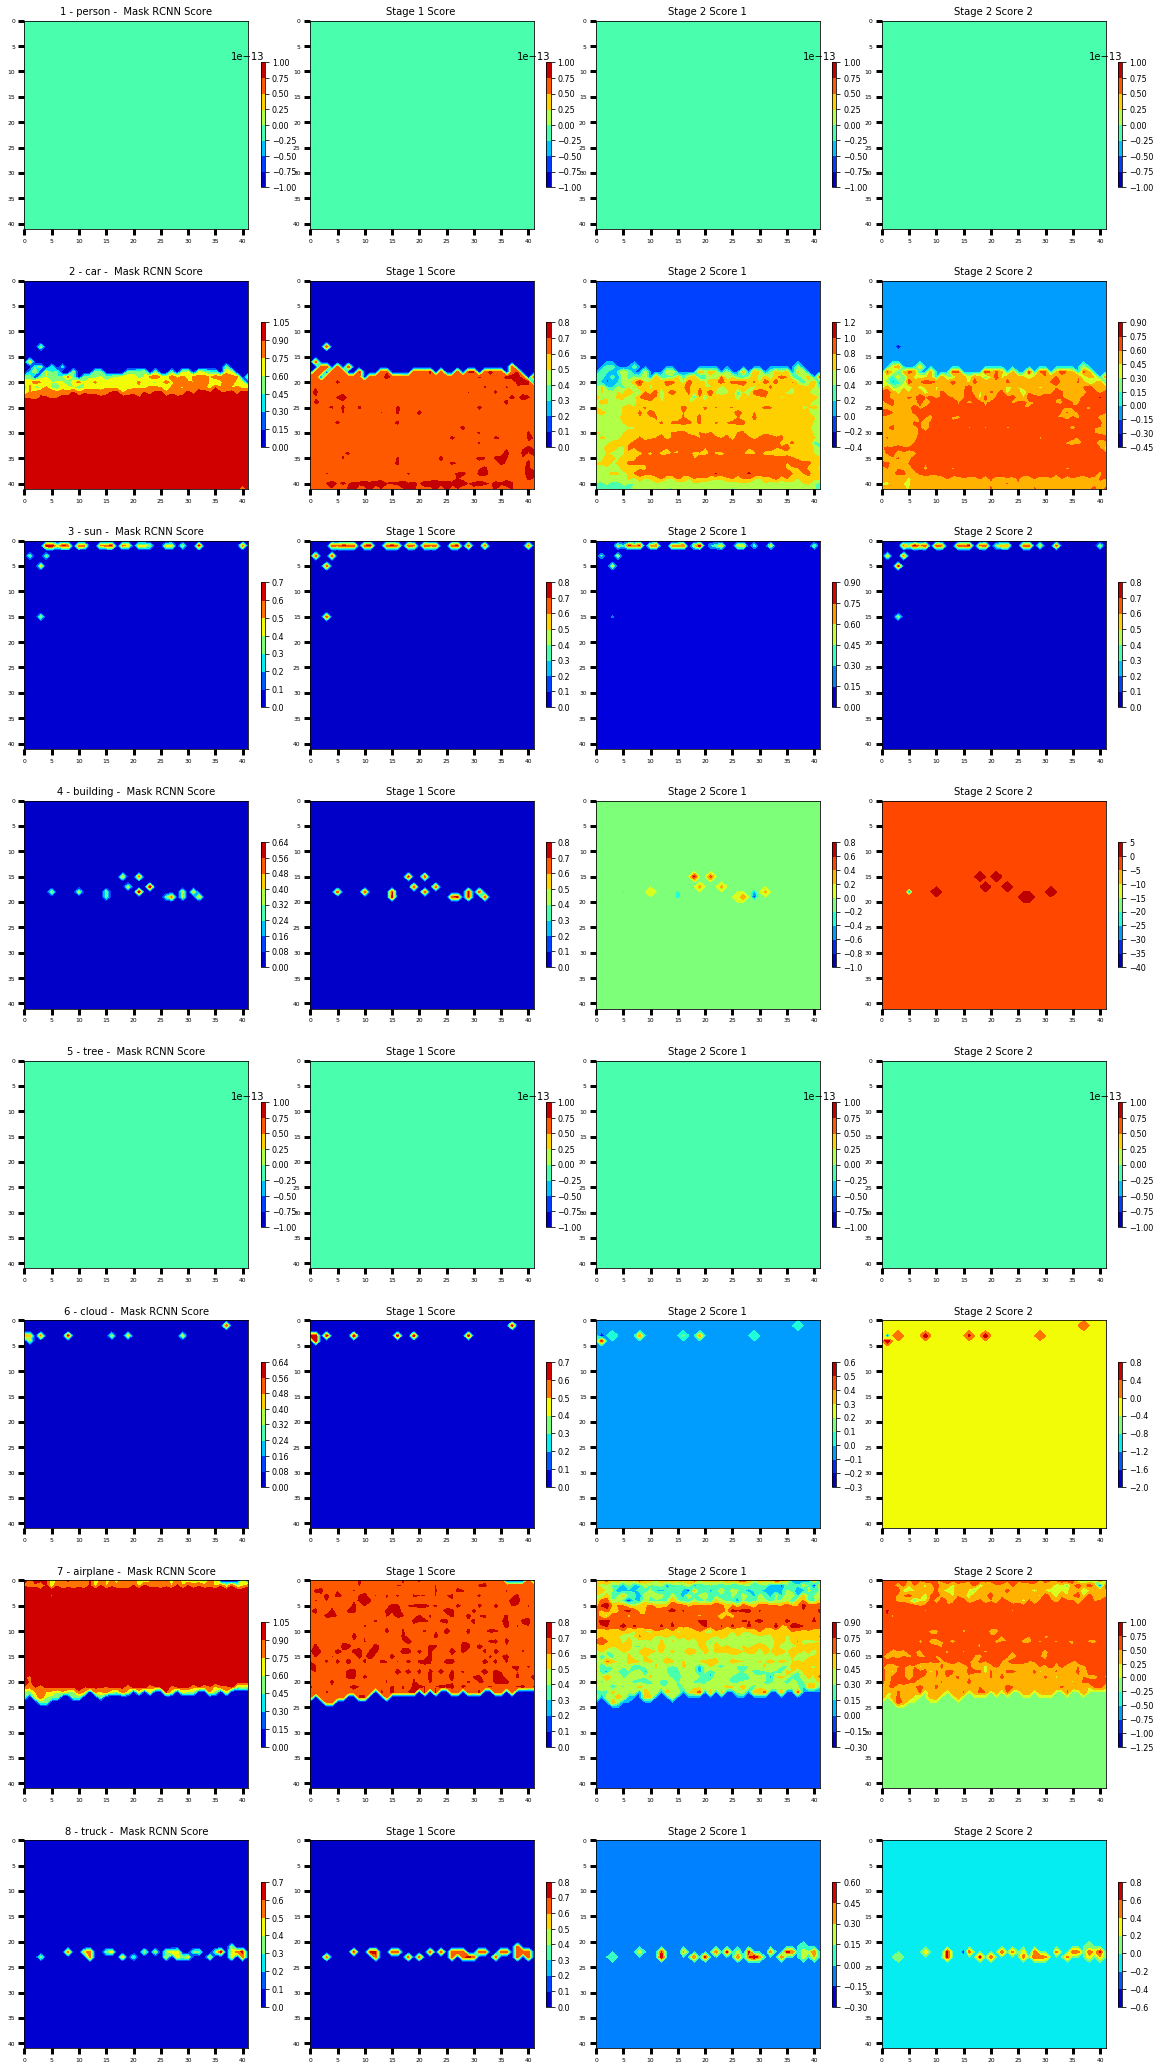

In [76]:
classes = [1,2,3,4,5,6,7,8]
# classes = [2,3,5,7,8]

print(load_file)
# _ =vis2.display_score_contours_compare(pr_scores, fcn_scores, class_names,  classes = classes)
_ =vis2.display_score_contours_compare(pr_scores, fcn_scores, class_names,  classes = classes, orig_scores = orig_scores)

#### Black Sun 

In [61]:
# save_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes_2/other"
# exp_prfx = 'exp6'
exp_desc = 'sun_black'
# cols = 9 
# image_id = 79
# classes = [1,2,3,4,5,6,7,8]

epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
mrcnn_epochs = mrcnn_files[MRCNN_FILE_IDX].split('_')[1].replace('.h5','')
load_file =  exp_prfx+'_i'+str(image_id)+'_e'+epochs+'_m'+mrcnn_epochs+'_'+exp_desc+'.npz'
print(' LOAD FILENAME:', load_file)

filename  = os.path.join(save_path, load_file)

if os.path.exists(filename):
    print('  input file: ', filename)
    loaddata = np.load(os.path.join(save_path, load_file))
    pr_agg_hm          = loaddata['fcn_agg_hm']
    pr_agg_hm_clipped  = loaddata['pr_agg_hm_clipped']
    fcn_agg_hm         = loaddata['fcn_agg_hm']
    fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']
    gt_cls_counts      = loaddata['gt_cls_counts']  
    dt_cls_counts      = loaddata['dt_cls_counts'] 
    if 'orig_scores' in loaddata:
        print(' orig_scores exists')
        orig_scores    = loaddata['orig_scores']
    else:
        print('  orig scores doesn''t exist ')
    fcn_scores         = loaddata['fcn_scores']
    pr_scores          = loaddata['pr_scores']
else: 
    print('file not found ', filename)

ttl = 'fcn hm - img '+str(image_id)+'  epoch:'+str(epochs) +'  '+ exp_desc 

 LOAD FILENAME: exp6_i79_e0266_m0020_sun_black.npz
  input file:  /home/kbardool/git_projs/mrcnn3/train_newshapes_2/other/exp6_i79_e0266_m0020_sun_black.npz
 orig_scores exists


exp6_i79_e0266_m0020_sun_black.npz


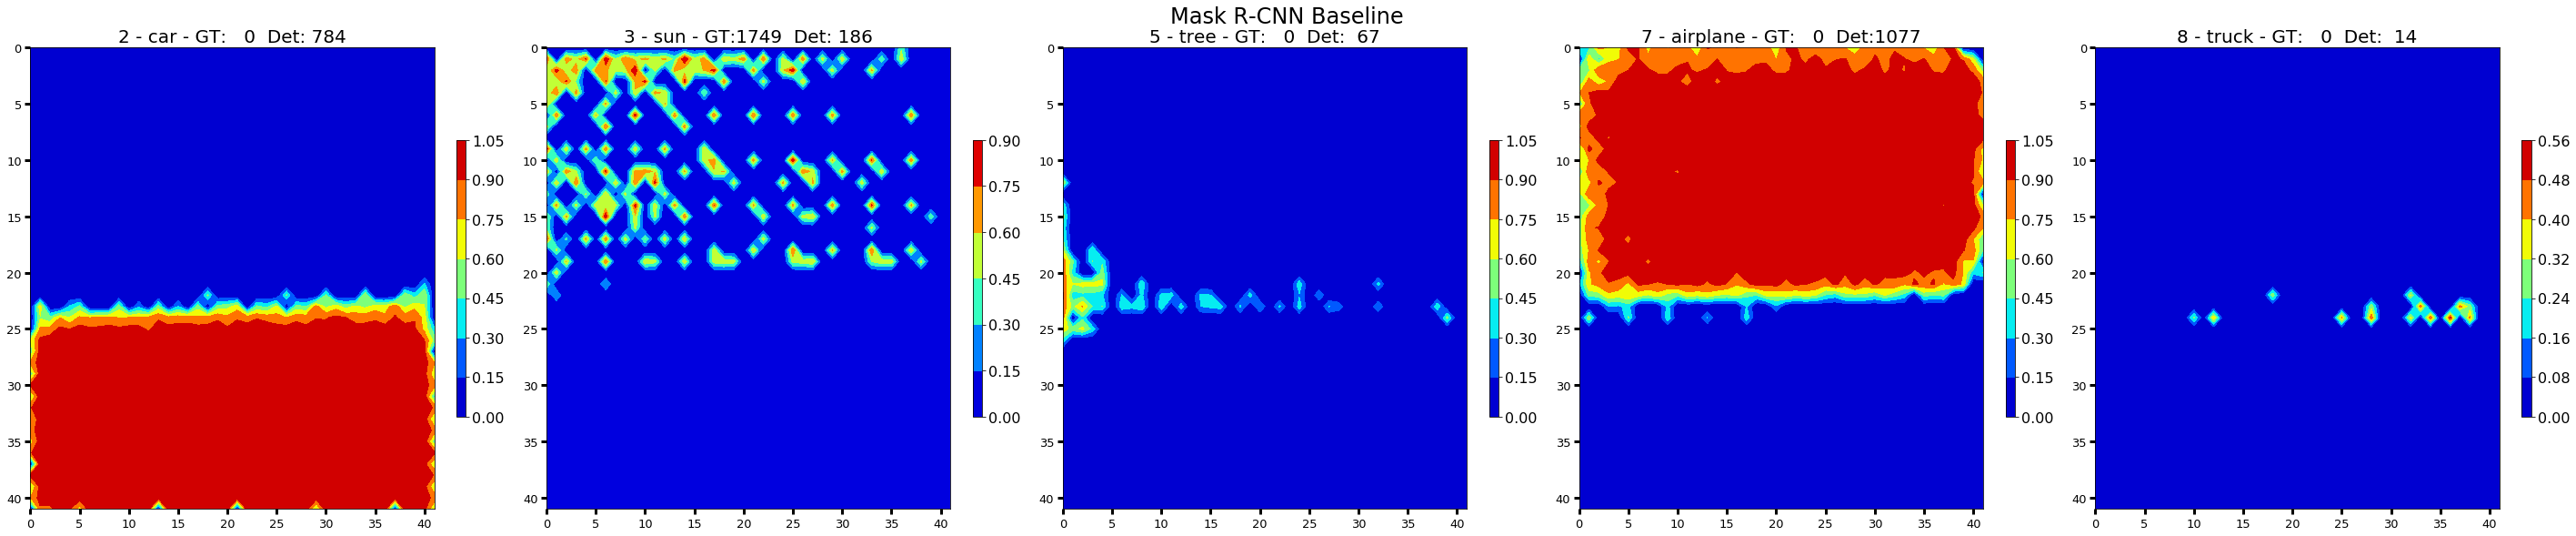

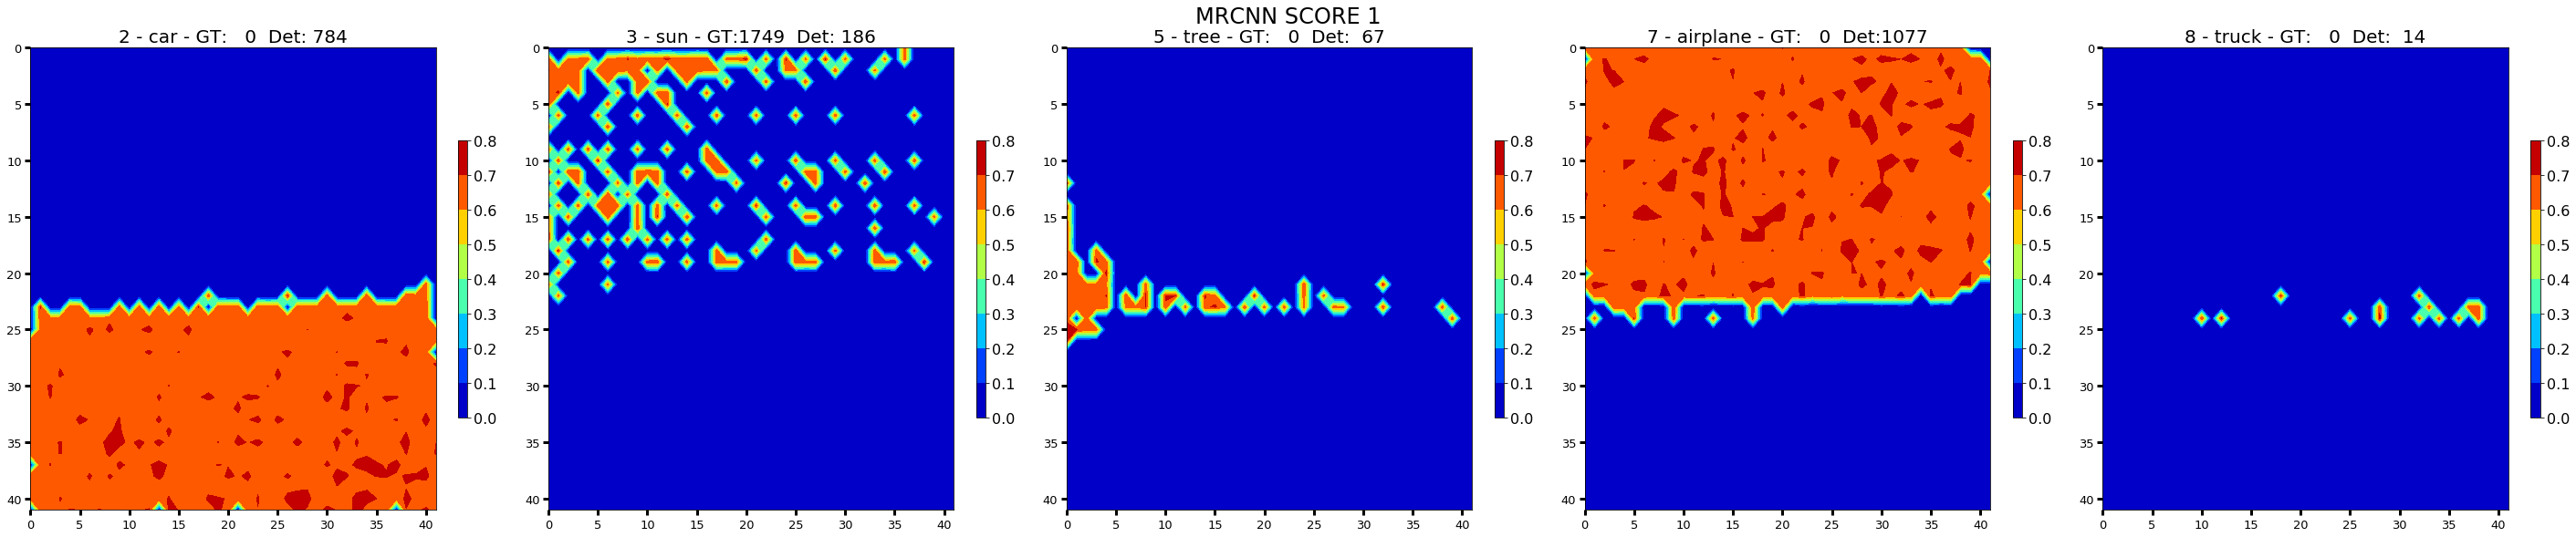

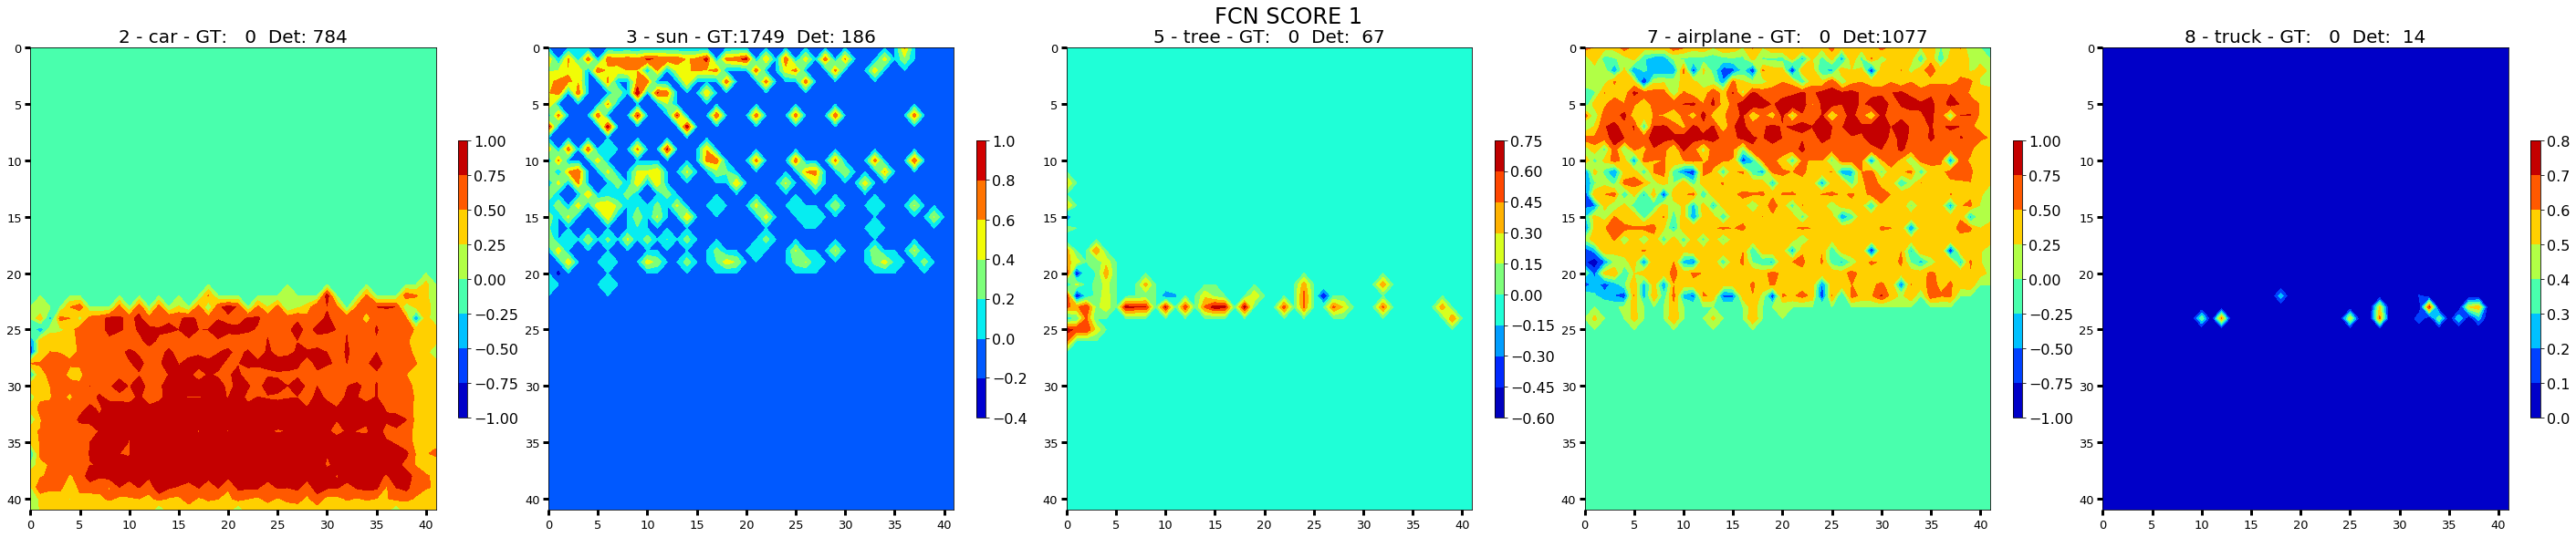

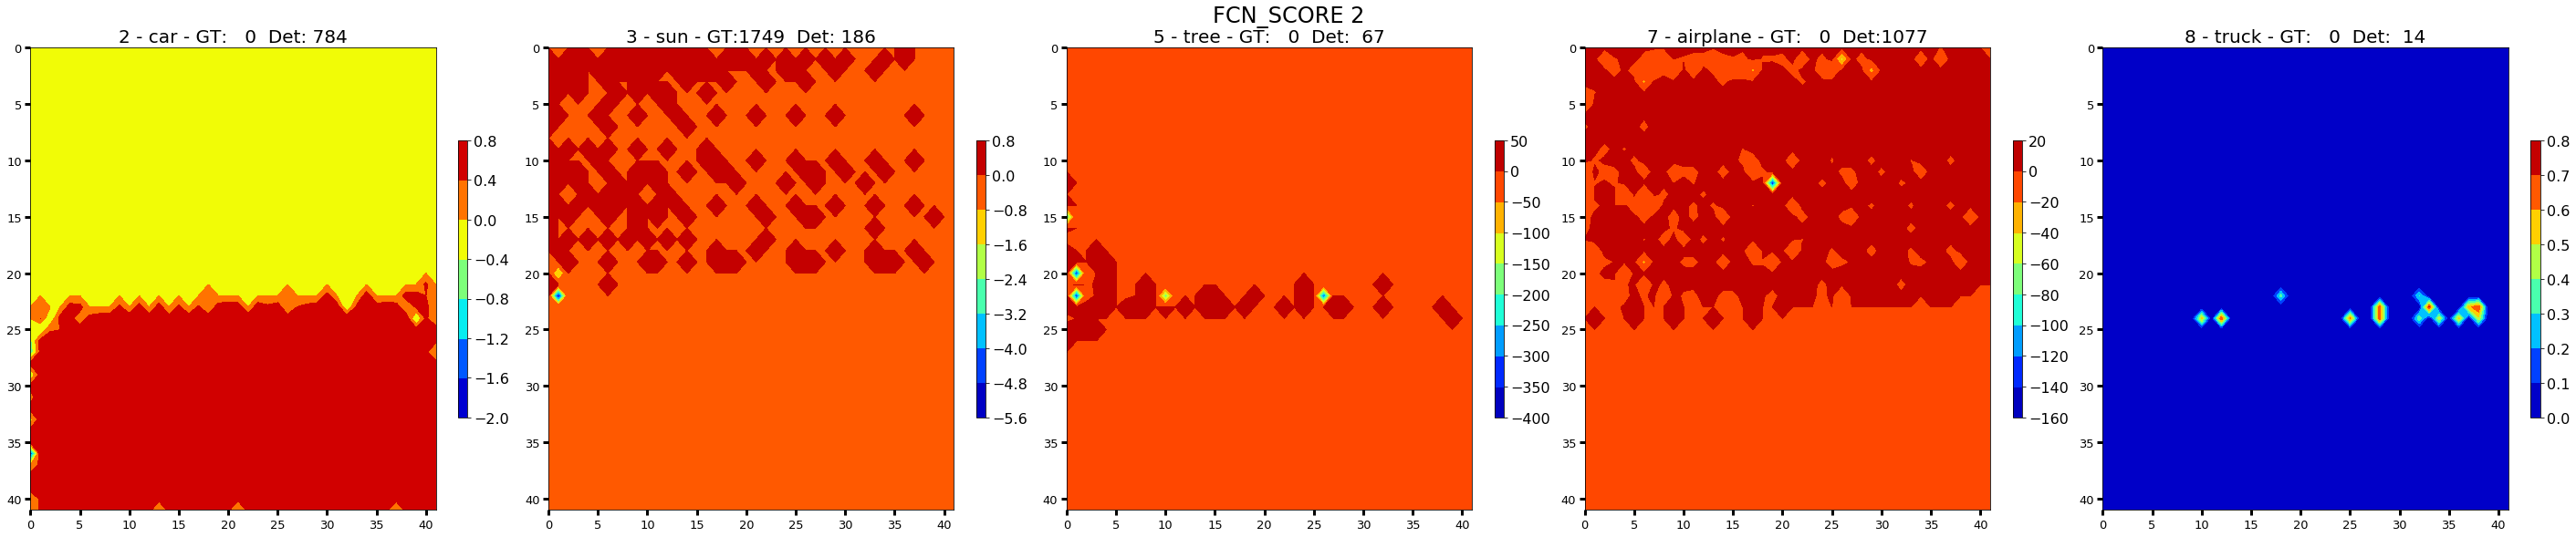

In [62]:
# print(ttl, cols)
classes = [1,2,3,4,5,6,7,8]
# classes = [1,3,4,5,6,7]
classes = [2,3,5,7,8]

print(load_file)
_ =vis2.display_score_contours(orig_scores[0]  , gt_cls_counts, dt_cls_counts, class_names, title ='Mask R-CNN Baseline', classes = classes)
_ =vis2.display_score_contours(pr_scores[0]  , gt_cls_counts, dt_cls_counts, class_names, title ='MRCNN SCORE 1 ', classes = classes)
_ =vis2.display_score_contours(fcn_scores[0], gt_cls_counts, dt_cls_counts, class_names, title = 'FCN SCORE 1 ', classes = classes)
_ =vis2.display_score_contours(fcn_scores[1], gt_cls_counts, dt_cls_counts, class_names, title = 'FCN_SCORE 2 ', classes = classes)

exp6_i79_e0266_m0020_sun_black.npz
 Num features:  4 Rows / Columns:  4 4


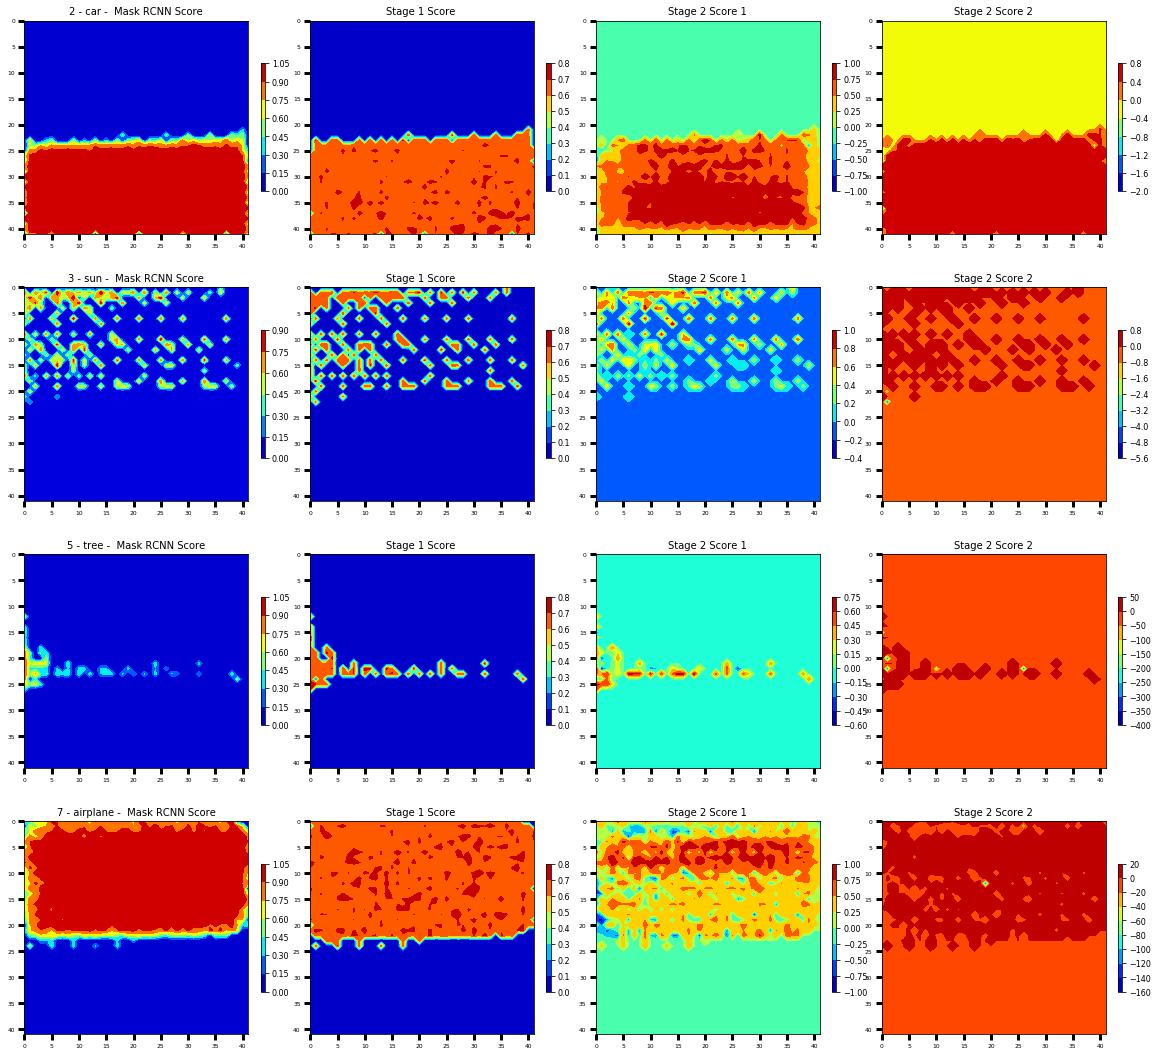

In [64]:
classes = [1,2,3,4,5,6,7,8]
classes = [2,3,5,7]

print(load_file)
# _ =vis2.display_score_contours_compare(pr_scores, fcn_scores, class_names,  classes = classes)
_ =vis2.display_score_contours_compare(pr_scores, fcn_scores, class_names,  classes = classes, orig_scores = orig_scores)

(9, 1, 1)


../mrcnn/visualize_2.py:905: RuntimeWarning: invalid value encountered in true_divide
  out /= (x.max(axis=(1,2), keepdims = True) - x.min(axis=(1,2), keepdims = True))
/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


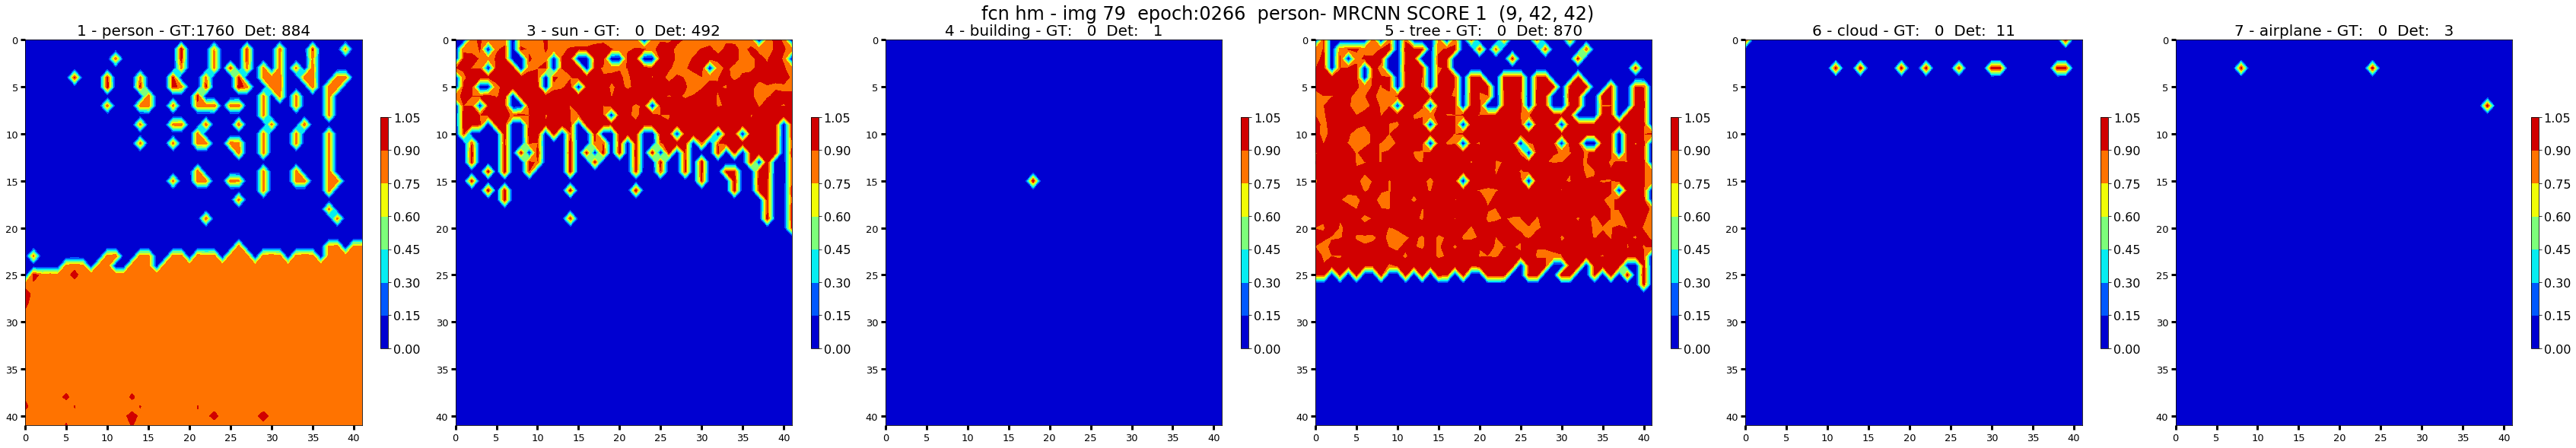

(9, 1, 1)


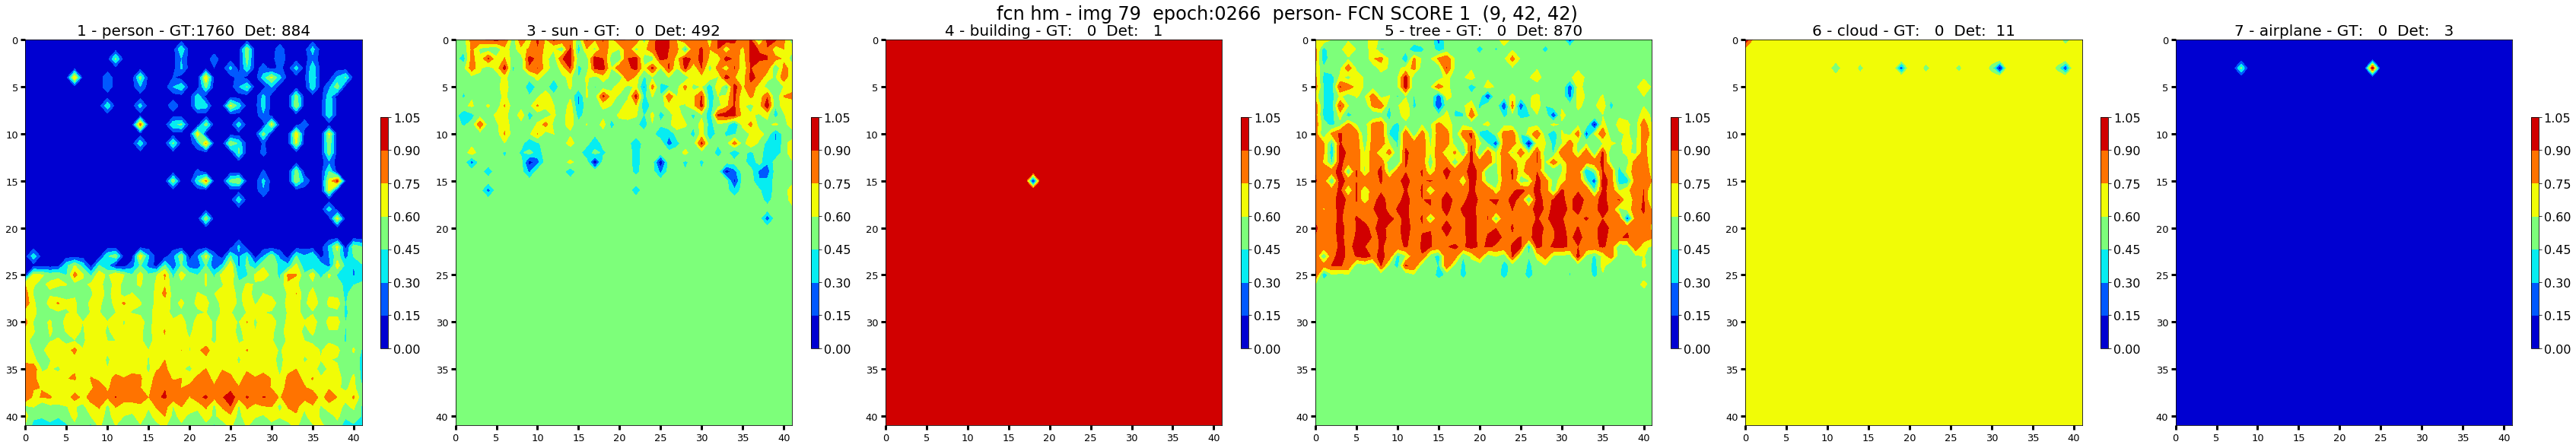

(9, 1, 1)


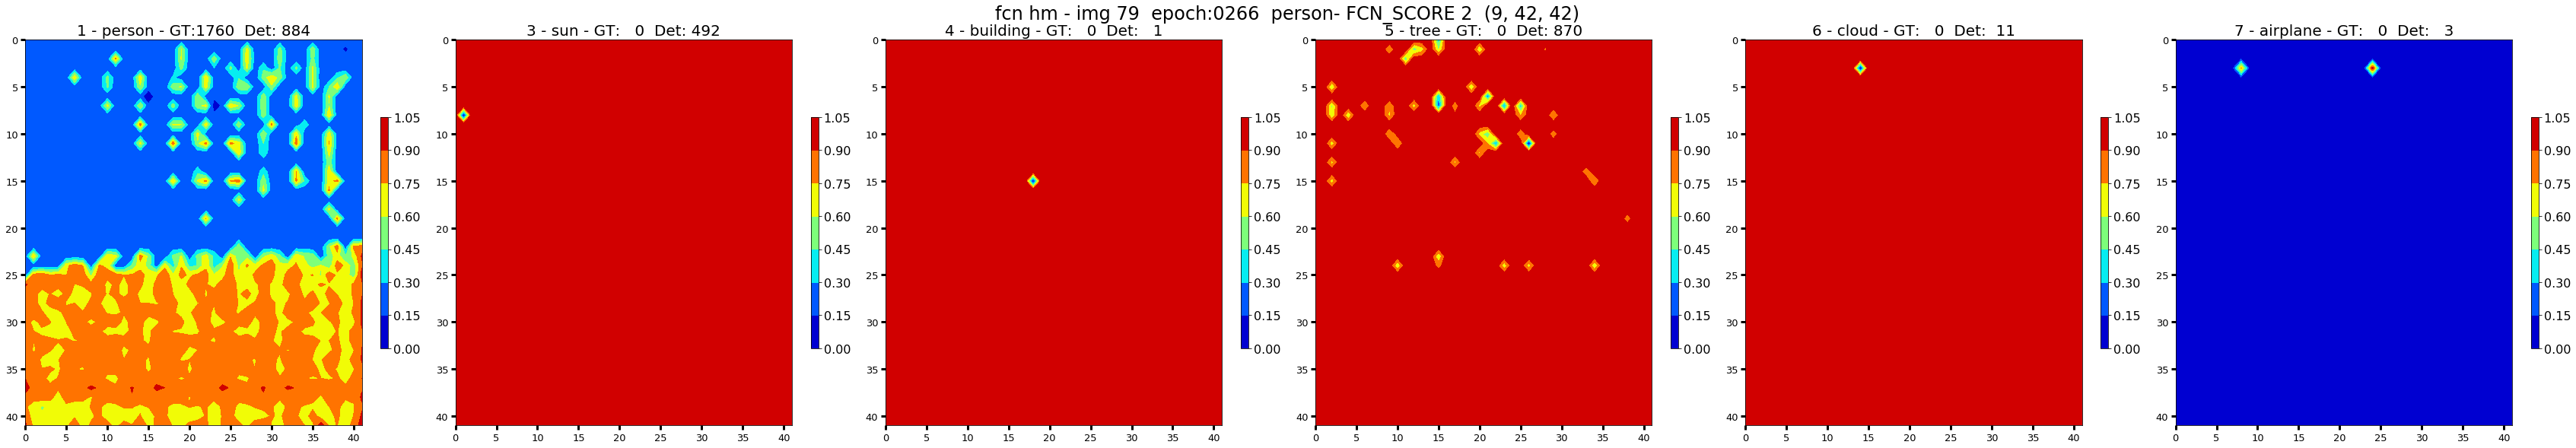

In [49]:
# print(ttl, cols)
# # classes = [1,2,3,4,5,6,7,8],2, keepdims=True
# classes = [2,3,4,6,7,8]

# print(results['fcn_scores'][1].shape, p1.shape)
# p1 = np.linalg.norm(results['pr_scores'][0],1, axis = (1,2), keepdims=True)
_ =vis2.display_score_contours(vis2.normalize_fcn_score(pr_scores[0]) , gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- MRCNN SCORE 1 ', classes = classes)
# _ =vis2.display_score_contours(results['pr_scores'][0]/p1 , gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- MRCNN SCORE 1 ', classes = classes)

# p1 = np.linalg.norm(results['fcn_scores'][0],1, axis = (1,2), keepdims=True)
_ =vis2.display_score_contours(vis2.normalize_fcn_score(fcn_scores[0]), gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN SCORE 1 ', classes = classes)
# _ =vis2.display_score_contours(results['fcn_scores'][0]/p1, gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN SCORE 1 ', classes = classes)


# p1 = np.linalg.norm(results['fcn_scores'][1],1, axis = (1,2), keepdims=True)
_ =vis2.display_score_contours(vis2.normalize_fcn_score(fcn_scores[1]), gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN_SCORE 2 ', classes = classes)
# _ =vis2.display_score_contours(results['fcn_scores'][1]/p1, gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN_SCORE 2 ', classes = classes)

In [315]:
# classes = [2,3,4,6,7,8]
# # print(results['fcn_scores'][1].shape, p1.shape)
# p1 = np.linalg.norm(pr_scores[0],1, axis = (1,2), keepdims=True)
# _ =vis2.display_score_contours(pr_scores[0]/p1 , gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- MRCNN SCORE 1 ', classes = classes)
# p1 = np.linalg.norm(fcn_scores[0],1, axis = (1,2), keepdims=True)
# _ =vis2.display_score_contours(fcn_scores[0]/p1, gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN SCORE 1 ', classes = classes)
# p1 = np.linalg.norm(fcn_scores[1],1, axis = (1,2), keepdims=True)
# _ =vis2.display_score_contours(fcn_scores[1]/p1, gt_cls_counts, dt_cls_counts, class_names, title = ttl +'- FCN_SCORE 2 ', classes = classes)

## Display Aggregate Heatmaps

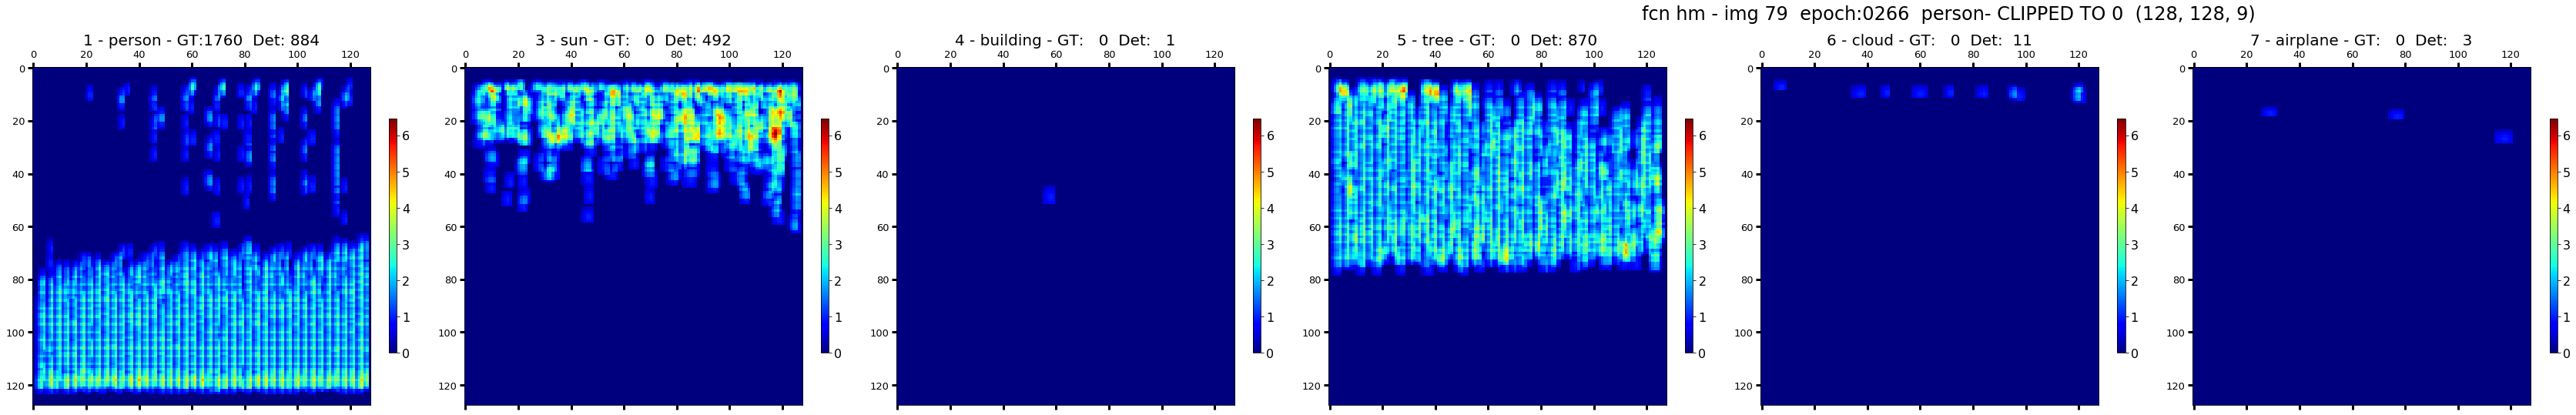

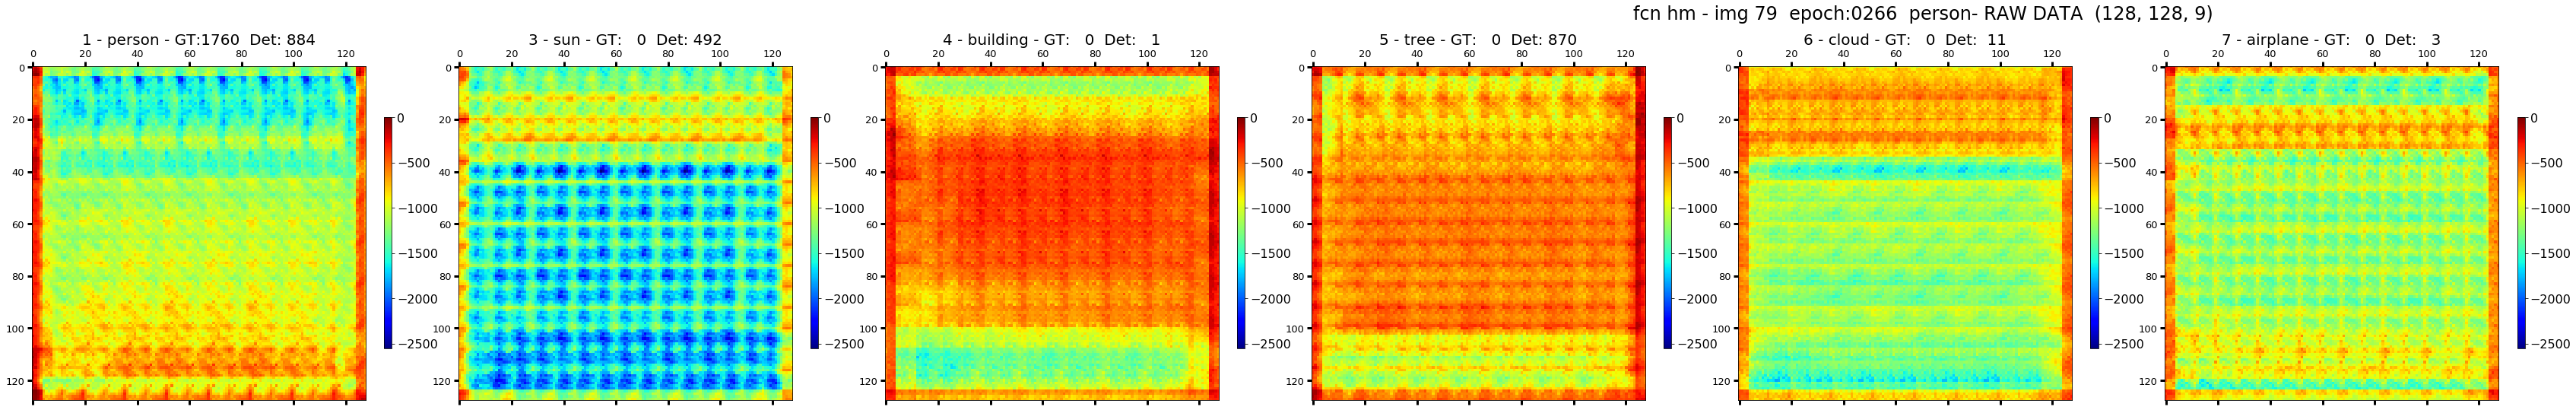

(128, 128, 9)


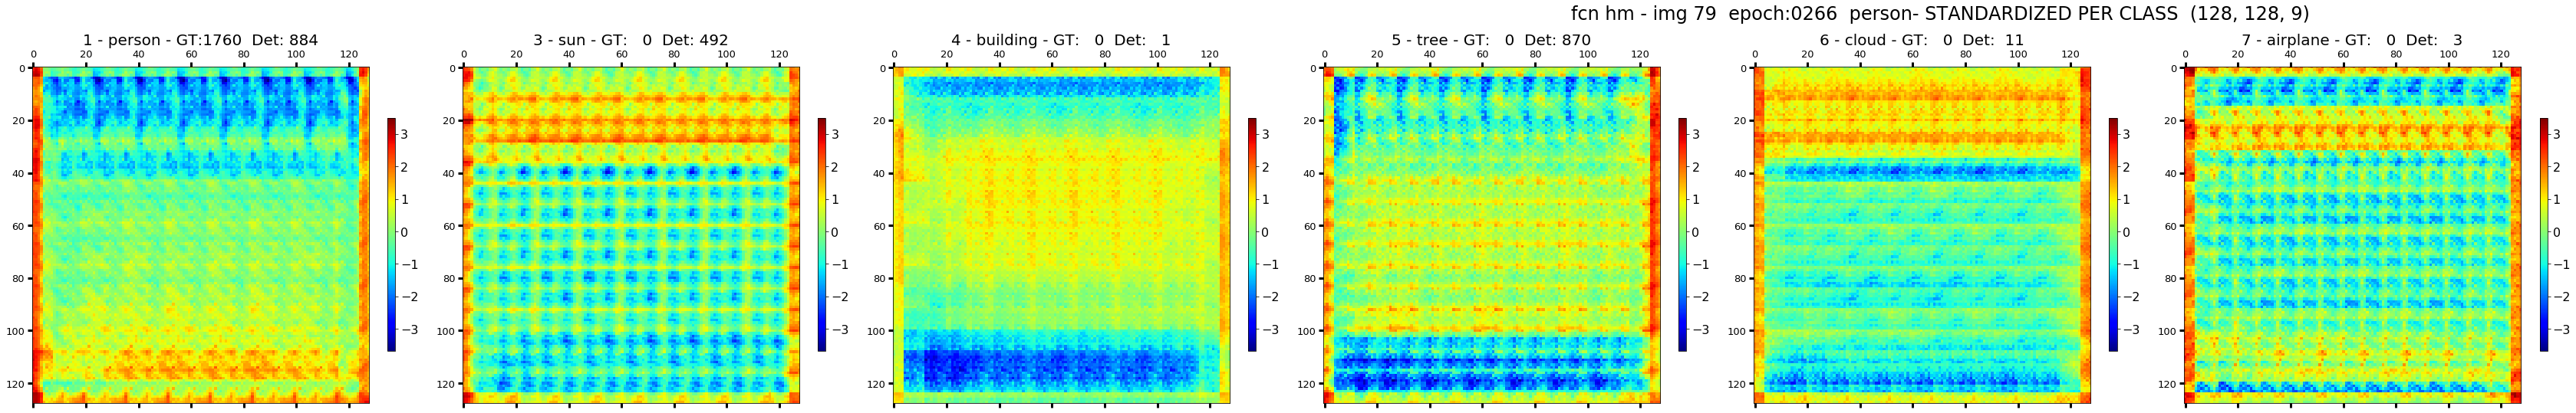

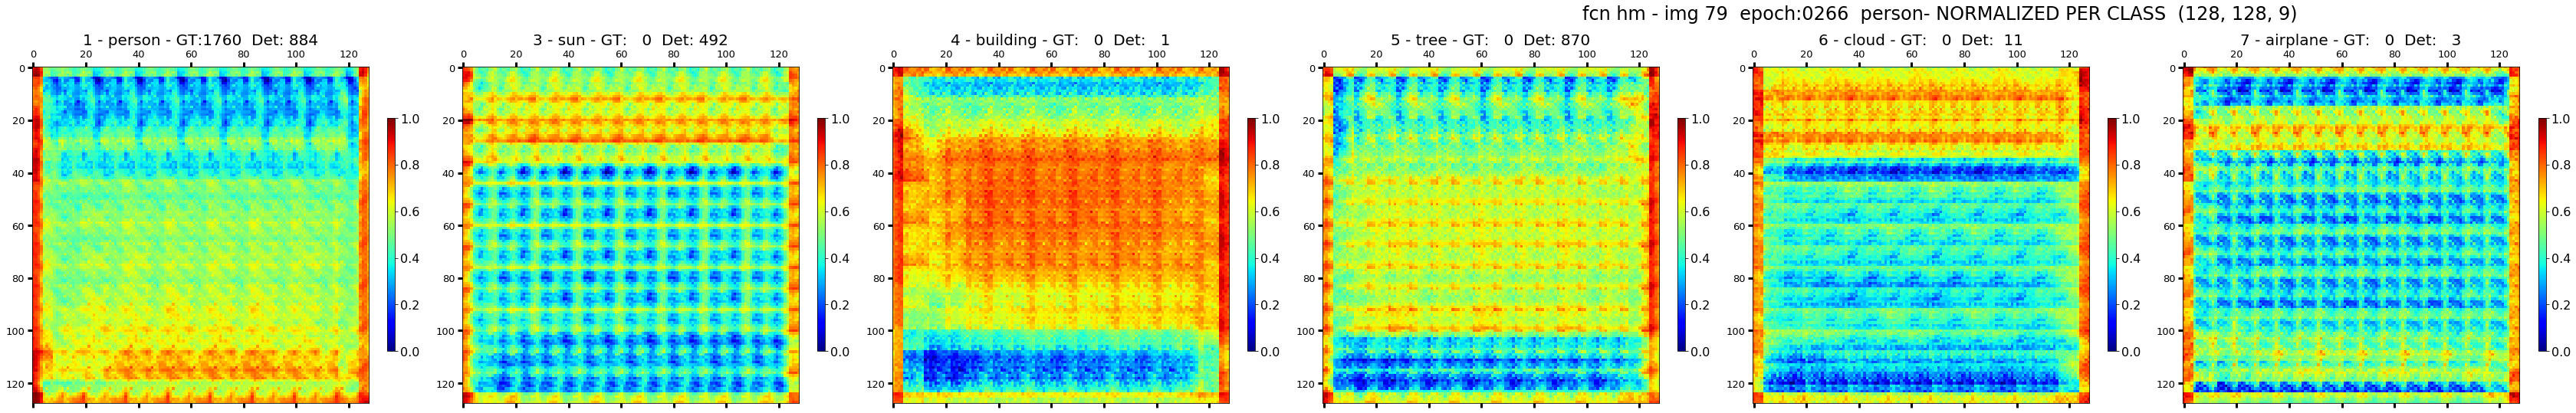

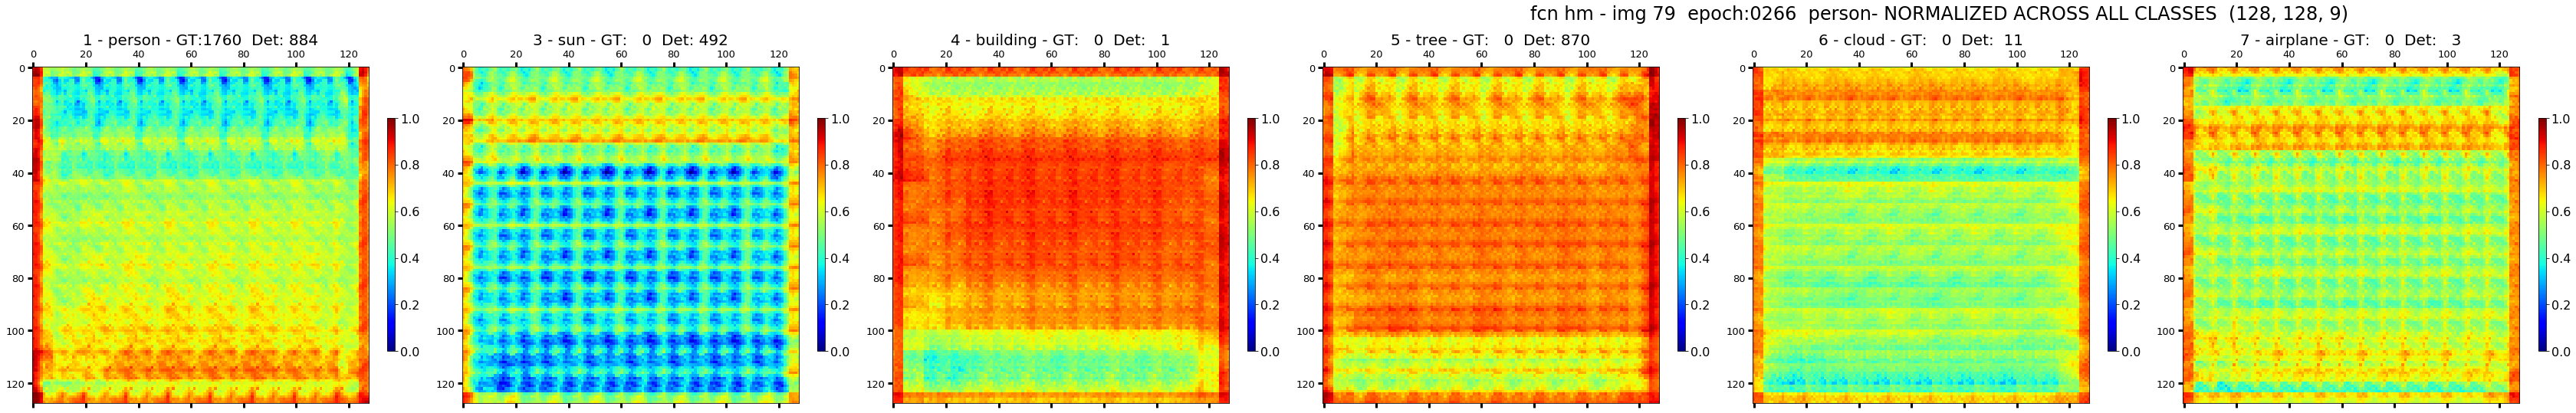

In [50]:
_ =vis2.display_fcn_agg_heatmaps(pr_agg_hm_clipped, gt_cls_counts, dt_cls_counts, class_names, columns =cols, title = ttl +'- CLIPPED TO 0 ', classes = classes)
_ =vis2.display_fcn_agg_heatmaps(pr_agg_hm, gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- RAW DATA ', norm = False, classes = classes)
# vis2.display_fcn_agg_heatmaps(vis2.deprocess_image(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- DEPROCESSED ', classes = classes)
_ =vis2.display_fcn_agg_heatmaps(vis2.standardize_fcn_hm(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- STANDARDIZED PER CLASS ', classes = classes)
_ =vis2.display_fcn_agg_heatmaps(vis2.normalize_fcn_hm(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- NORMALIZED PER CLASS ', classes = classes)
_ = vis2.display_fcn_agg_heatmaps(vis2.normalize_all(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- NORMALIZED ACROSS ALL CLASSES ', classes = classes)

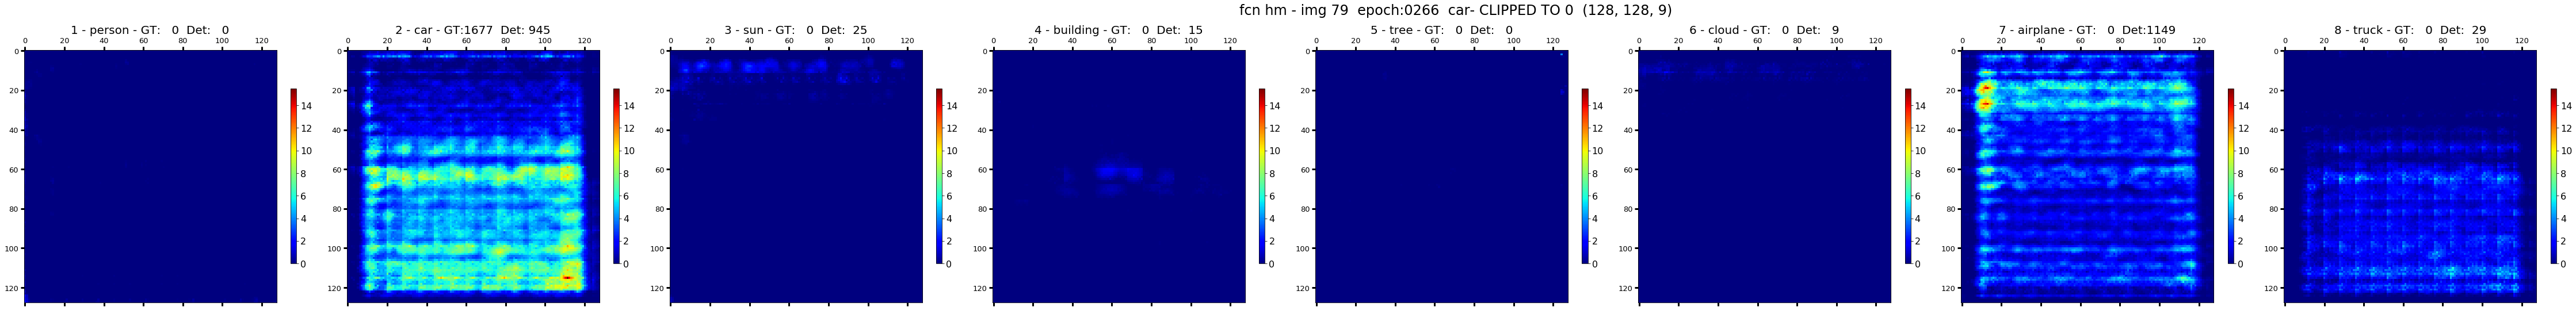

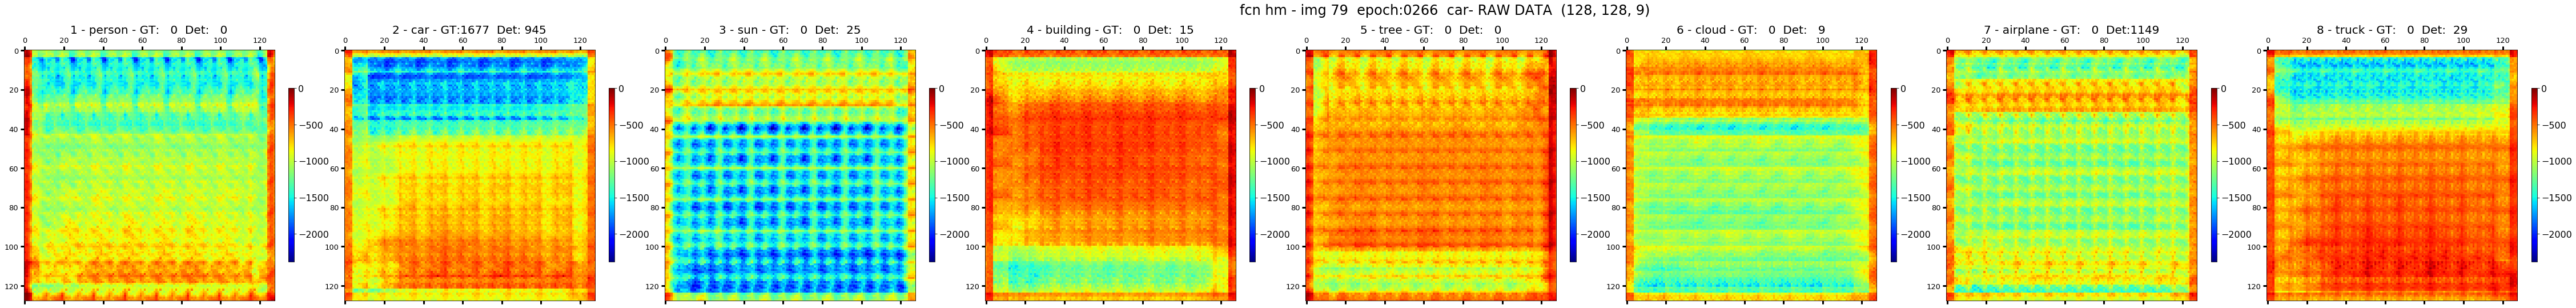

(128, 128, 9)


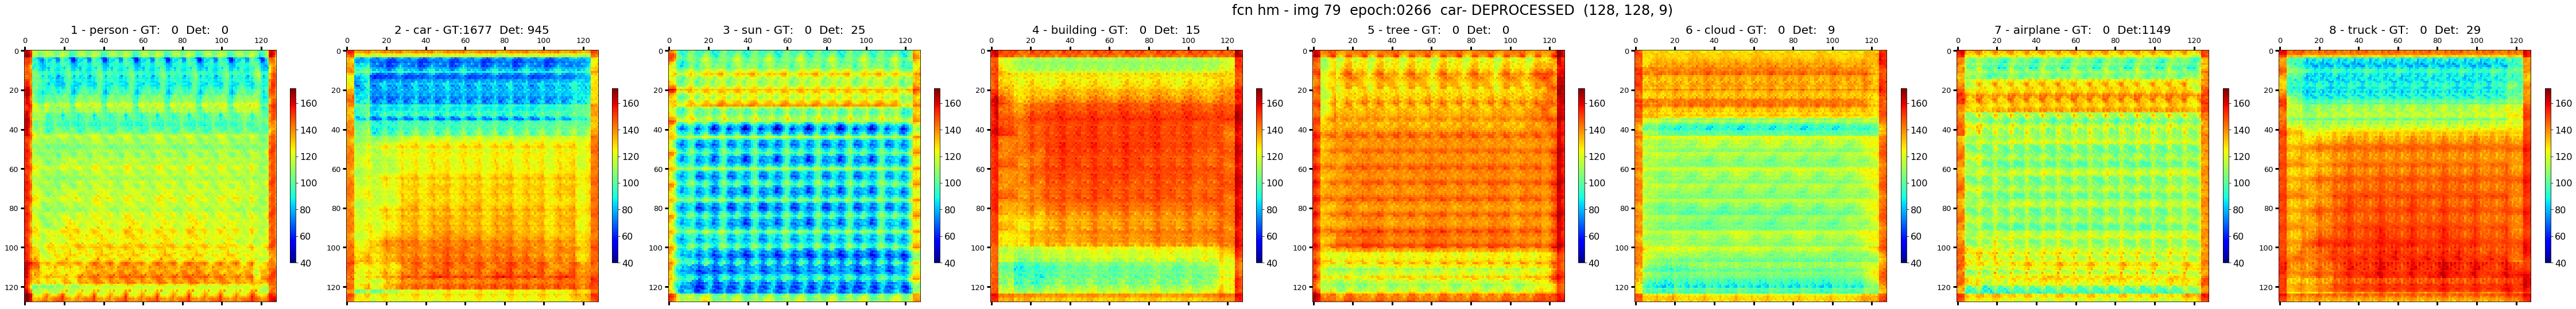

(128, 128, 9)


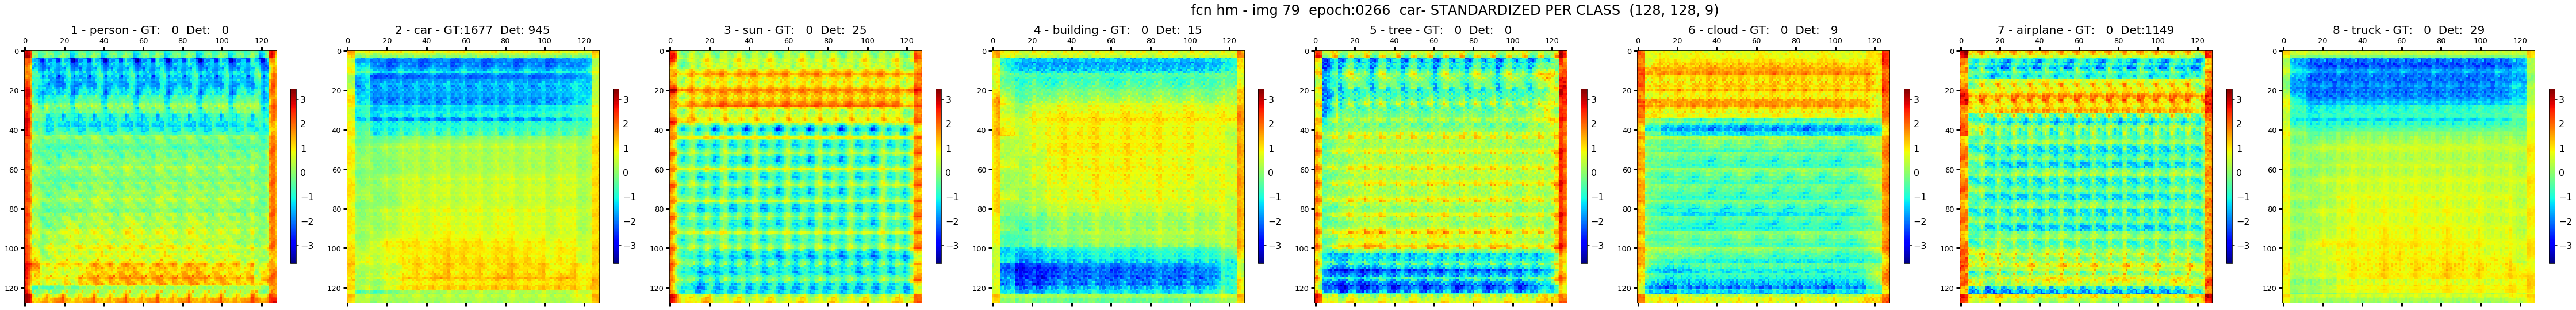

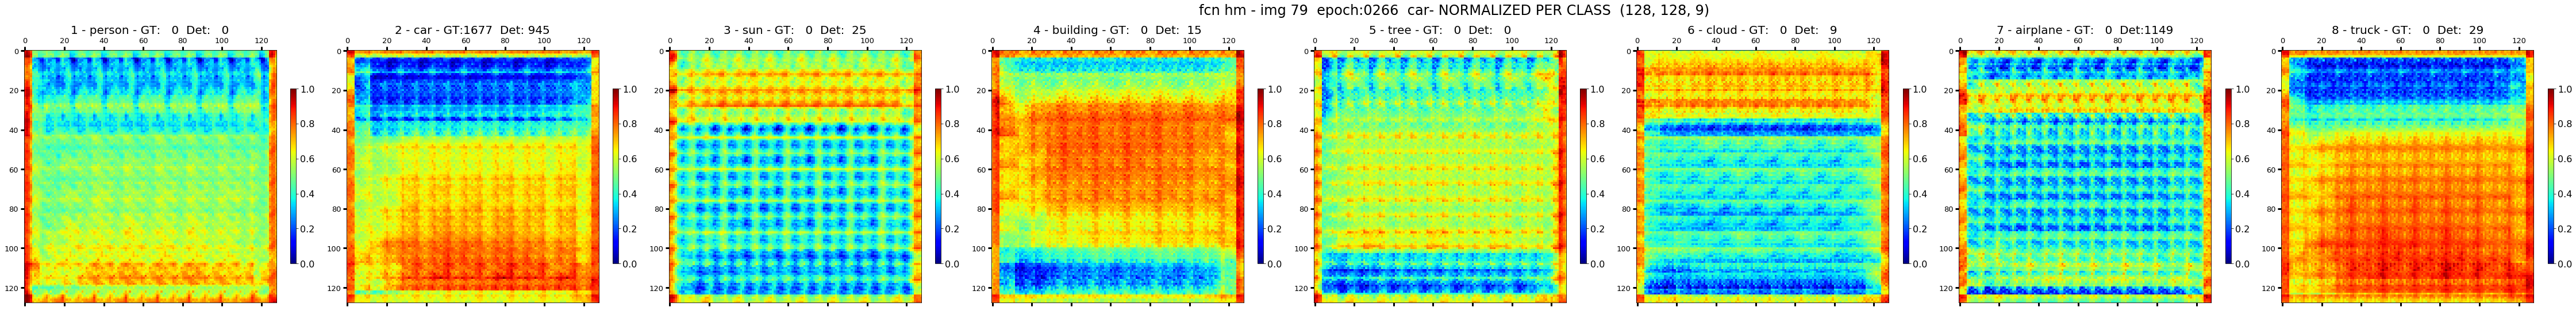

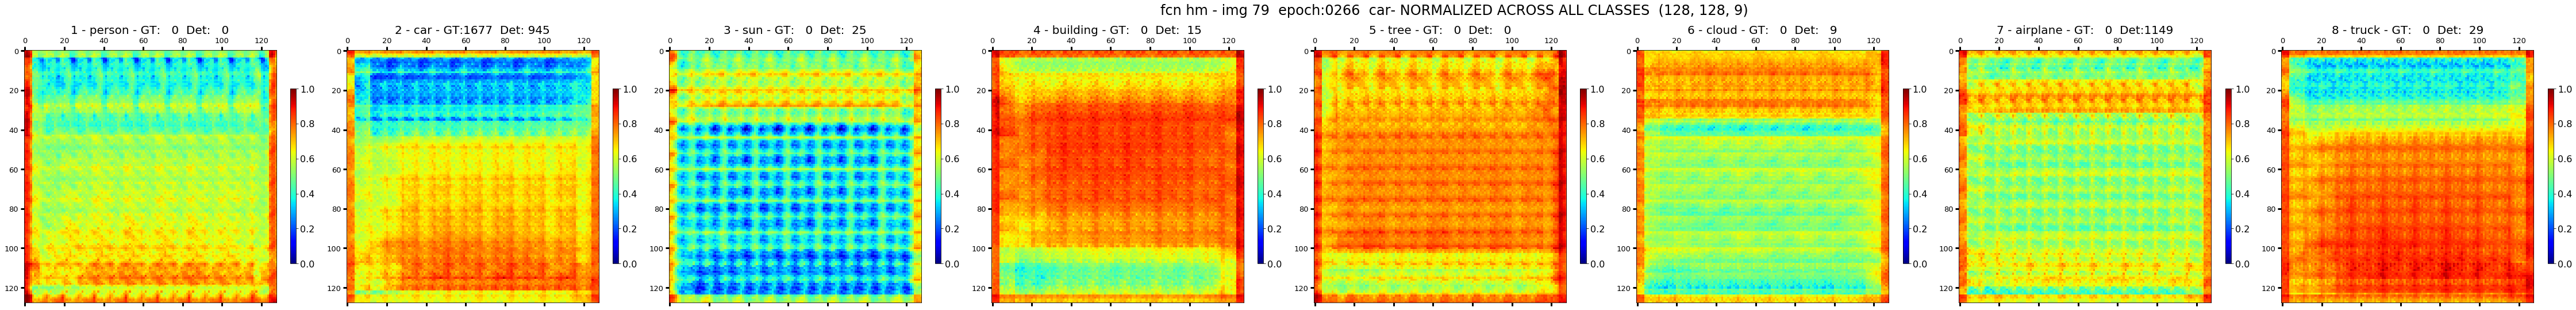

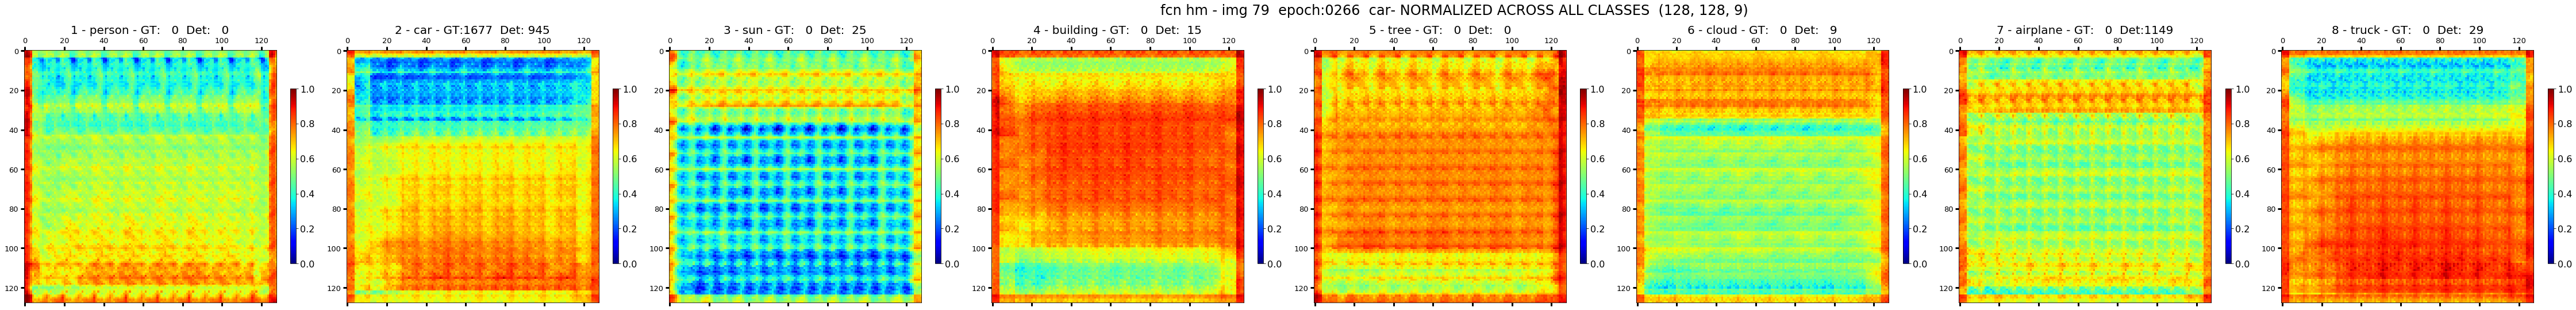

In [72]:
classes = [1,2,3,4,5,6,7,8]

_ =vis2.display_fcn_agg_heatmaps(fcn_agg_hm_clipped, gt_cls_counts, dt_cls_counts, class_names, columns =cols, title = ttl +'- CLIPPED TO 0 ', classes = classes)
_ =vis2.display_fcn_agg_heatmaps(fcn_agg_hm, gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- RAW DATA ', norm = False, classes = classes)
_ =vis2.display_fcn_agg_heatmaps(vis2.deprocess_image(fcn_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- DEPROCESSED ', classes = classes)
_ =vis2.display_fcn_agg_heatmaps(vis2.standardize_fcn_hm(fcn_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- STANDARDIZED PER CLASS ', classes = classes)
_ =vis2.display_fcn_agg_heatmaps(vis2.normalize_fcn_hm(fcn_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- NORMALIZED PER CLASS ', classes = classes)
_ =vis2.display_fcn_agg_heatmaps(vis2.normalize_all(fcn_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- NORMALIZED ACROSS ALL CLASSES ', classes = classes)

In [ ]:
delta = fcn_agg_hm_clipped - pr_agg_hm_clipped
vis2.display_fcn_agg_heatmaps(delta, gt_cls_counts, dt_cls_counts, class_names, columns =cols, title = ttl +'- CLIPPED TO 0 ', classes = classes)

In [ ]:
print(fcn_agg_hm.min(axis=(0,1), keepdims = True))
print(fcn_agg_hm.min( keepdims = True))


## Load and Display saved .npz file 

In [ ]:
# epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
epochs = '0266'
image_id =  176
load_file =  'exp2_img'+'_'+str(image_id)+'_epoch_'+epochs+'.npz'
print('  input file: ',os.path.join(save_path, load_file))

In [ ]:
loaddata = np.load(os.path.join(save_path, load_file))
# print(type(loaddata))
# print(loaddata.keys)
# print(type(loaddata['gt_ttl_img_by_inst']),'  ', type(loaddata['gt_ttl_img_by_inst'][0]))

gt_cls_counts      = loaddata['gt_cls_counts']  
dt_cls_counts      = loaddata['dt_cls_counts']  
# imgs_one_gt        = loaddata['imgs_one_gt']  
# imgs_one_dt        = loaddata['imgs_one_dt'] 
# gt_ttl_img_by_inst = loaddata['gt_ttl_img_by_inst']
# dt_ttl_img_by_inst = loaddata['dt_ttl_img_by_inst']
# sav_pr_min         = loaddata['sav_pr_min'] 
# sav_pr_max         = loaddata['sav_pr_max']  
# sav_fcn_min        = loaddata['sav_fcn_min']
# sav_fcn_max        = loaddata['sav_fcn_max']
pr_agg_hm          = loaddata['pr_agg_hm']
pr_agg_hm_clipped  = loaddata['pr_agg_hm_clipped']
fcn_agg_hm         = loaddata['fcn_agg_hm']
fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']

print('Agg heatmap Calcs complete for epoch:', epochs , ' (heatmap file:', load_file, ')')
# display_results(loaddata)

In [ ]:
# hmfig = vis2.display_pairwise_heatmap(gt_ttl_img_by_inst, [0,1,2,3,4,5,6,7,8], class_names)

### mask_rcnn output

In [ ]:
classes = [1,2,3,4,5,6,7,8]
vis2.display_fcn_input(pr_agg_hm, gt_cls_counts, dt_cls_counts, class_names, classes = classes, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - NOT clipped ')
vis.plot_2d_gaussian(pr_agg_hm[:,:,1], size =(5,5), title = 'MRCNN produced heatmap')

### mask_rcnn output - normalized

In [ ]:
vis2.display_fcn_input_1(vis2.normalize_fcn_hm(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - NOT clipped ')
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(pr_agg_hm[:,:,2]), size =(5,5))

In [ ]:
vis.display_image_gt(dataset_test, dataset_test.config, image_id , size = 5, verbose = False)   

### mask_rcnn output - standarize and clip

In [ ]:
vis2.display_fcn_input_1(vis2.standardize_fcn_hm(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - Standardized - ')
vis2.display_fcn_input_1(vis2.deprocess_image(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - NOT Clipped - Normalized - ')

###  mask_rcnn clipped  
(pr_agg_hm_clipped is same as pr_agg_hm since the ouptut of R-CNN is [0,1]

In [ ]:
vis2.display_fcn_input_1(pr_agg_hm_clipped, gt_cls_counts, dt_cls_counts, class_names , cmap = 'jet', columns = 7, title = 'rcnn heatmaps - clipped to [0 ,1]')

In [ ]:
vis2.display_fcn_input_1(vis2.normalize_fcn_hm(pr_agg_hm_clipped), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - clipped to [0,1] and Normalized - ')

In [ ]:
vis2.display_fcn_input_1(vis2.deprocess_image(pr_agg_hm_clipped), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - clipped to [0,1] and Normalized - ')

###  fcn

In [ ]:
vis2.display_fcn_input_1(fcn_agg_hm, gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns =7, title = 'fcn heatmaps - NOT clipped to [0,1]')
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,1]), size =(5,5))
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,2]), size =(5,5))

In [ ]:
vis2.display_fcn_input_1(fcn_agg_hm, gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns =7, title = 'fcn heatmaps - NOT clipped to [0,1]')
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,1]), size =(5,5))
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,2]), size =(5,5))

In [ ]:
vis2.display_fcn_input_1(fcn_agg_hm, gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns =7, title = 'fcn heatmaps - NOT clipped to [0,1]')
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,1]), size =(5,5))
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,2]), size =(5,5))

### fcn normalized

In [ ]:
vis2.display_fcn_input_1(vis2.normalize_fcn_hm(fcn_agg_hm), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'fcn heatmaps - NOT clipped to [0,1],  Normalized -')

### fcn clipped

In [ ]:
vis2.display_fcn_input_1(fcn_agg_hm_clipped, gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'fcn heatmaps - clipped to [0,1] - ')

### fcn clipped - normalized

In [ ]:
# vis2.display_fcn_input_1(vis2.deprocess_image(fcn_agg_hm_clipped), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'fcn heatmaps - clipped to [0 ,1] and Normalized - ')

## 2D Plots  

####  2D plot of `model_gt_heatmap` returned from model

In [ ]:
fig = visualize.plot_2d_heatmap(model_gt_heatmap, model_gt_heatmap_scores, img_id, gt_class_ids, 
                          class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

####  2D plot of `pred_heatmap_norm` returned from MRCNN 

In [ ]:
fig = visualize.plot_2d_heatmap(model_pr_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, columns = 3, 
                            class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model

In [ ]:
fig = visualize.plot_2d_heatmap(model_fcn_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, columns = 3,
                          class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model - ALL CLASSES

In [ ]:
fig = visualize.plot_2d_heatmap(model_fcn_heatmap, model_gt_heatmap_scores, img_id,
                                class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

In [ ]:
fig.savefig('fcn_heatmaps_2d.png')

####  2D comparative display `pred_heatmap` / `fcn_heatmap`  

In [ ]:
fig = visualize.plot_2d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, model_pr_heatmap_scores, 
                        img_id, class_ids = pr_class_ids, class_names = coco_class_names, scale = 4, scaling = True )    

##  3D Plots

####  3D plot of  `gt_heatmap_norm` returned form code above

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_3d_heatmap(model_gt_heatmap, img_id, gt_class_ids, class_names = coco_class_names, scaling='class')

####  3D plot of `pred_heatmap_norm` returned form model

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_pr_heatmap, img_id, pr_class_ids, class_names = coco_class_names, zlim = 'class' , scaling = 'none')

####  3D plot of `fcn_heatmap` returned form model - only classes in pred_scores

In [ ]:
print(np.max(model_fcn_heatmap), np.min(model_fcn_heatmap))

print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_fcn_heatmap, img_id, pr_class_ids,class_names = coco_class_names, scaling = 'none')

####  3D plot of `fcn_heatmap` returned form model - all classes

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
#     plot_3d_heatmap(model_fcn_heatmap, img_id, class_ids,class_names = class_names, size = (8,8), zlim=0)
visualize.plot_3d_heatmap(model_fcn_heatmap, img_id, class_names = coco_class_names, columns = 3,scaling = 'all')

####  3D comparative display `pred_heatmap` / `fcn_heatmap` 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, img_id, class_ids = pr_class_ids, 
                            class_names = coco_class_names, size=(8,8), zlim = 'all' , scaling = 'all')

####  3D comparative display `gt_heatmap` / `fcn_heatmap` 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_3d_heatmap_compare(model_gt_heatmap, model_fcn_heatmap, img_id, gt_class_ids, class_names = coco_class_names, scaling = 'none')